<a href="https://www.kaggle.com/code/tsheposono/mastersproject?scriptVersionId=121857060" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Applying Machine Learning Models to Predict the Reaction of Stock Market Returns to Changing Economic Activities in South Africa

(2023) Tshepo Chris Nokeri. Master of Science in Computer Science by Dissertation. University of the Witwatersrand, School of Computer Science and Applied Mathematics. Supervision by Dr. Ritesh Ajoodha and Mr. Rudzani Mulaudzi. 

# Research Purpose[](http://)

This research investigates the dynamics of the economy and how stock market returns react to changing economic activities in South Africa. It considers multiple experimental scenarios, i.e., different feature sets, data dimensions, and model parameters, to determine whether machine learning models perform differently than the benchmark model (the vector autoregressive model) when predicting the reaction of stock market returns. Not only that, but it also produces an economic index that offers insight into economic activities in South Africa.

# Python Library Packages Specification

This segement specifies Python libraries applied in this. These are a collection of modules that bundle of codes.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization
%matplotlib inline
sns.set("talk", "ticks", font_scale = 1, font = "Calibri")  # set global visualization style
plt.rcParams["figure.figsize"] = (12, 7) # set global visualization style
from mpl_toolkits.mplot3d import Axes3D # 3D visualization
import warnings
warnings.filterwarnings("ignore") # ignore warnings
import statsmodels.api as sm # statistical analysis
from sklearn.feature_selection import SelectFromModel # feature selection
from statsmodels.tsa.seasonal import seasonal_decompose # seasonal decomposition
from statsmodels.tsa.api import VAR  # vector autoregressive model
from statsmodels.tsa.vector_ar.var_model import VAR # vector autoregressive model
from statsmodels.tsa.stattools import adfuller, grangercausalitytests # ADF-Fuller and Granger Causality test
from sklearn import metrics # model performance appraisal 
from sklearn.preprocessing import StandardScaler # standard scaling strategy
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet # ordinary least-square, ridge, lasso, and elastic net
from statsmodels.tsa.stattools import adfuller # augmented Dickey-Fulller test 
from sklearn.tree import DecisionTreeRegressor # decision tree model
from sklearn.impute import KNNImputer # k-nearest neighbor imputation strategy
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # decision tree, random forest tree, and extreme gradient boosting
from sklearn.neural_network import BernoulliRBM, MLPRegressor # Bernoulli restricted Boltzmann machine and multilayer perceptron
from sklearn.pipeline import Pipeline # plpeline
from sklearn.decomposition import PCA # principal components analysis
import datetime as dt # datetime 
from sklearn import (linear_model, metrics, neural_network, pipeline, preprocessing, model_selection) # linear models, metrics, neural netowkr, pipeline, preprocessing, and model selection
from xgboost import XGBRegressor # extreme gradient boosting
import tensorflow as tf # tensorflow back-end
from keras.models import Sequential # plain layers
from keras.layers import Dense, Dropout, SimpleRNN,Conv2D, Flatten, Dense, LSTM, GRU # dense layer, dropout layer, recurrent neural network, flatten layer, long-short term memory, and gated recurrent unit
from keras.wrappers.scikit_learn import KerasRegressor # scikit-learn wrapper
from keras import regularizers # neural network regularizers
from sklearn.model_selection import GridSearchCV # grid-search cross-validation
from sklearn.model_selection import train_test_split # data partitioning
from sklearn.model_selection import learning_curve # learning curve

/kaggle/input/mscprojectcompletedatasets/fred_sa_macroeconomic_dataset.xls
/kaggle/input/mscprojectcompletedatasets/sarb_banks_and_mutual_banks_dataset.xlsx
/kaggle/input/mscprojectcompletedatasets/sarb_international_economic_dataset.xlsx
/kaggle/input/mscprojectcompletedatasets/sarb_economic_dataset.xlsx
/kaggle/input/mscprojectcompletedatasets/ftse_jse_alsi_dataset.xlsx
/kaggle/input/mscprojectcompletedatasets/sarb_national_government_finance_dataset.xlsx
/kaggle/input/mscprojectcompletedatasets/sarb_capital_market_dataset.xlsx


In [2]:
pip install xlrd # installs xlrd, a library for reading data and formatting information from Excel files

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
np.random.seed(0) # for reproducability

# Data Acqusition

This research extracts 54 monthly economic features from the South African Reserve Bank (SARB) database, 99 monthly economic features from the Federal Reserve Economic Data (FRED) database, along with the monthly FTSE/JSE all-share index price feature from the JSE database. The sample period was selected because the Financial Times Stock Exchange/Johannesburg Stock Exchange (FTSE/JSE) all-share index was established in 2002 by the FTSE and JSE.

In [4]:
fred_sa_macroeconomic_dataset = pd.read_excel(r"/kaggle//input/mscprojectcompletedatasets/fred_sa_macroeconomic_dataset.xls", sheet_name = "Monthly", parse_dates = [0], index_col = [0]) # load economic monthly data from St. Louis FED, parse dates, and set date as index
sarb_banks_and_mutual_banks_dataset = pd.read_excel(r"/kaggle//input/mscprojectcompletedatasets/sarb_banks_and_mutual_banks_dataset.xlsx", parse_dates = [0], index_col = [0]) # load banks and mutual banks data extracted from the South African Reserve Bank, parse dates, and set date as index
sarb_capital_market_dataset = pd.read_excel(r"/kaggle//input/mscprojectcompletedatasets/sarb_capital_market_dataset.xlsx", parse_dates = [0], index_col = [0]) # load capital markets data extracted from the South African Reserve Bank, parse dates, and set date as index
sarb_economic_dataset = pd.read_excel(r"/kaggle//input/mscprojectcompletedatasets/sarb_economic_dataset.xlsx", parse_dates = [0], index_col = [0]) # load economic data from SARB, parse dates extracted from the South African Reserve Bank, and set date as index
sarb_international_economic_dataset = pd.read_excel(r"/kaggle/input/mscprojectcompletedatasets/sarb_international_economic_dataset.xlsx", parse_dates = [0], index_col = [0]) # load international economic data extracted from the South African Reserve Bank, parse dates, and set date as index
sarb_national_government_finance_dataset = pd.read_excel(r"/kaggle/input/mscprojectcompletedatasets/sarb_national_government_finance_dataset.xlsx", parse_dates = [0], index_col = [0]) # load national government finance data extracted from the South African Reserve Bank, parse dates, and set date as index
ftse_jse_alsi_dataset = pd.read_excel(r"/kaggle/input/mscprojectcompletedatasets/ftse_jse_alsi_dataset.xlsx", parse_dates = [0], index_col = [0]) # load FTSE/JSE ALSI data from JSE, parse dates, and set date as index

# Strategies used to Cleanse and Preprocess Data Before Predicting the Reaction of Stock Market Returns to Changing Economic Activities in South Africa

The initial task was to remove duplicate features before combining data sets for redundancy avoidance in analysis, rename features to their official names, concatenate data from different data sources, index and format the data, specify the sample period, place feature values in decimal points, convert infinity values of a float type to $NaN$ (missing feature values), impute missing feature values using the $k$ nearest neighbor data imputation strategy, make features stationary, replace outliers in the complete data set with $median$ values, randomly partition data and standardize it, and reduce data dimensions using the principal components analysis method.

In [5]:
# remove duplicate South African macroeconomic features
del fred_sa_macroeconomic_dataset["ZAFCPIALLMINMEI"]
del fred_sa_macroeconomic_dataset["ZAFLOCOSPNOSTSAM"]
del fred_sa_macroeconomic_dataset["ZAFLOCOSPORIXOBM"]
fred_sa_macroeconomic_dataset = pd.DataFrame(fred_sa_macroeconomic_dataset.loc["2002-06-28":]) # select sample period
# replace series codes with original feature names
fred_sa_macroeconomic_dataset = fred_sa_macroeconomic_dataset.rename(columns = {"BSCICP03ZAM665S": "Business Tendency Surveys for Manufacturing: CI: Composite Indicators: OECD Indicator ",                 
                                                                                "CCRETT01ZAM661N": "Real Effective Exchange Rates Based on Manufacturing Consumer Price ",
                                                                                "CCUSMA02ZAM618N": "National Currency to US Dollar Exchange Rate: Average of Daily Rates ",                                                      
                                                                                "CCUSSP02ZAM650N": "National Currency to US Dollar Spot Exchange Rate ",
                                                                                "CPGDFD02ZAM657N": "CPI: Total Food Excluding Restaurants ",                                                                
                                                                                "CPGREN01ZAM657N": "CPI: OECD Groups: Fuel, Electricity, and Gasoline ",
                                                                                "CPGRLE01ZAM657N": "CPI: OECD Groups: All Items Non-Food and Non-Energy ",                                                      
                                                                                "CRELTLZAM163N": "Commercial Real Estate Loans to Total Loans ",
                                                                                "CSCICP03ZAM665S": "COS: CI: Composite Indicators: OECD Indicator ",
                                                                                "EXP7910": "U.S. Exports of Goods by F.A.S. Basis to South Africa",
                                                                                "MP7910": "U.S. Imports of Goods by Customs Basis from South Africa",              
                                                                                "INTGSBZAM193N": "Interest Rates, Government Securities, Government Bonds ",
                                                                                "INTGSTZAM193N": "Interest Rates, Government Securities, Treasury Bills ",
                                                                                "IR3TTS01ZAM156N": "3-Month or 90-day Rates and Yields: Treasury Securities ",                                                                
                                                                                "RLTCT01ZAM156N": "Long-Term Government Bond Yields: Combined Terms ",     
                                                                                "IRLTLT01ZAM156N": "Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) ",
                                                                                "IRSTCB01ZAM156N": "Immediate Rates: Less than 24 Hours: Central Bank Rates ",                                                                
                                                                                "IRSTCI01ZAM156N": "Immediate Rates: Less than 24 Hours: Call Money/Interbank Rate ",                                                          
                                                                                "LATSTLZAM163N": "Liquid Assets to Short Term Liabilities ",              
                                                                                "LQASRTZAM163N": "Liquid Assets to Total Assets (Liquid Asset Ratio) ",                      
                                                                                "MANMM101ZAM189S": "M1 ",
                                                                                "IRLTCT01ZAM156N": "Long-Term Government Bond Yields: Combined Terms for South Africa",
                                                                                "MABMBM01ZAM657S" : "Broad Money, Index for South Africa (DISCONTINUED)",
                                                                                "MANMNM01ZAM657S": "Narrow Money, Index for South Africa (DISCONTINUED)",
                                                                                "MYAGM0ZAM189N": "M0 ",                                                   
                                                                                "MYAGM2ZAM189N": "M2 ",
                                                                                "MYAGM3ZAM189S": "M3 ", 
                                                                                "NBZABIS": "Broad Effective Exchange Rate ",                        
                                                                                "PIEAMI02ZAM661N": "PPI: EC: Domestic Mining and Quarrying Activities ",                                 
                                                                                "PIEAMP02ZAM659N": "PPI: EC: Domestic Manufacturing ",                                                          
                                                                                "RBZABIS": "Real Broad: Effective Exchange Rate ",                   
                                                                                "RCTRWAZAM163N": "Bank Regulatory Capital to Risk-Weighted Assets ",      
                                                                                "RETASTZAM163N": "Return on Assets ",                                     
                                                                                "RETEQTZAM163N": "Return on Equity ",                                     
                                                                                "RT1CRAZAM163N": "Regulatory Tier 1 Capital to Risk-Weighted Assets ",    
                                                                                "TRESEGZAM052N": "Total Reserves excluding Gold ",                        
                                                                                "VALEXPZAM052N": "Goods, Value of Exports ",                              
                                                                                "VALIMPZAM052N": "Goods, Value of Imports ",                              
                                                                                "XTEITT01ZAM156S": "Ratio of Exports to Imports ",                          
                                                                                "XTEXVA01ZAM667S": "Exports: Value Goods ",                                 
                                                                                "XTIMVA01ZAM664S": "Imports: Value Goods ",                                 
                                                                                "XTNTVA01ZAM664S": "Net Trade: Value Goods ",                               
                                                                                "ZAFCP010000GYM": "CPI: Food and non-Alcoholic beverages: Total",                                         
                                                                                "ZAFCP030000GYM": "CPI: Clothing and footwear: Total",
                                                                                "ZAFCP040000GYM": " CPI: Housing, water, electricity, gas and other fuels",
                                                                                "ZAFCP040100GYM": "CPI: Housing, water, electricity, gas and other fuels: Actual rentals for housing: Total ",       
                                                                                "ZAFCP040200GYM": "CPI: Alcoholic beverages, tobacco and narcotics (COICOP 02): Total",                            
                                                                                "ZAFCP040300GYM": "CPI: Housing, water, electricity, gas and other fuels: Maintenance and repairs of the dwellings",                                                                
                                                                                "ZAFCP040400GYM": "CPI: Housing, water, electricity, gas and other fuels: Water supply and msc.: Total ",                                      
                                                                                "ZAFCP040500GPM": "CPI: Housing, water, electricity, gas and other fuels: Electricity, gas and other fuels", 
                                                                                "ZAFCP050000GYM": "CPI: Furnishings, household equip. and routine household maintenance: Total",      
                                                                                "ZAFCP060000GYM": "CPI: Health (COICOP 06): Total",                                                                
                                                                                "ZAFCP070000GPM": "CPI: Transport: Total",                                                                
                                                                                "ZAFCP070200GYM": "CPI: Transport: Fuels and lubricants for personal transport equipment: Total ",                  
                                                                                "ZAFCP080000GPM": "CPI: Communication: Total",                                                          
                                                                                "ZAFCP090000GPM": "CPI: Recreation and culture: Total",                                                      
                                                                                "ZAFCP100000GYM": "CPI: Education: Total",                                                                
                                                                                "ZAFCP110000GYM": "CPI: Restaurants and hotels: Total",                                                      
                                                                                "ZAFCP120000GPM": "CPI: Miscellaneous goods and services: Total",                                         
                                                                                "ZAFCPALTT01IXNBM": "CPI: All items: Total",                     
                                                                                "ZAFCPICORMINMEI": "CPI: All Items Excluding Food and Energy ",                                                                
                                                                                "ZAFCPIENGMINMEI": "CPI: Energy ",                         
                                                                                "ZAFLOCOBDNOSTSAM": "LL OECD: CS: BTS - Demand or orders inflow: Normalised ",                                   
                                                                                "ZAFLOCOBSNOSTSAM": "LL OECD: CS: BTS - Business situation: Normalised ",                                           
                                                                                "ZAFLOCODWNOSTSAM": "LL OECD: CS: Construction: Normalised ",                                                      
                                                                                "ZAFLOCODWORMLSAM": "LL OECD: CS: Construction: Original series ",                                               
                                                                                "ZAFLOCOSINOSTSAM": "LL OECD: CS: Interest rate spread: Normalised ",                                           
                                                                                "ZAFLOCOSIORSTM": "LL OECD: CS: Interest rate spread: Original series ",                                             
                                                                                "ZAFLOCOVRNOSTSAM": "LL OECD: CS: Car registration - sales: Normalised ",                                           
                                                                                "ZAFLOLITOAASTSAM": "LL OECD: LL: CLI: Amplitude adjusted ",                                                      
                                                                                "ZAFLOLITONOSTSAM": "LL OECD: LL: CLI: Normalised ",                                                                
                                                                                "ZAFLOLITOTRGYSAM": "LL OECD: LL: CLI: Trend restored ",                                                          
                                                                                "ZAFLORSGPNOSTSAM": "LL OECD: Reference series: GDPNormalised ",                                    
                                                                                "ZAFLORSGPRTSTSAM": "LL OECD: Reference series: GDPRatio to trend ",                                
                                                                                "ZAFLORSGPTDSTSAM": "LL OECD: Reference series: GDPTrend ",                                         
                                                                                "ZAFMABMM301GYSAM": "Broad money and components: M3 ",                                               
                                                                                "ZAFMANMM101IXOBSAM": "Narrow money and components: M1 and components: M1 ",                                
                                                                                "ZAFODCNPI03MLSAM": "Orders: Construction: Permits issued: Dwellings / Residential buildings ",                                            
                                                                                "ZAFPERMITMISMEI": "Permits Issued for Dwelling ",                           
                                                                                "ZAFPIEAMI02GYM": "PPI: EC: Mining and quarrying activities: Domestic ",                                 
                                                                                "ZAFPIEAMP02GPM": "PPI: EC: Manufacturing: Domestic ",                                                      
                                                                                "ZAFPIEATI02GPM": "PPI: EC: Industrial activities: Domestic ",                                             
                                                                                "ZAFPPDMMINMEI": "Domestic PPI: Manufacturing ",        
                                                                                "ZAFPRCNTO01MLSAM": "Production: Construction: Total construction: Total ",                                      
                                                                                "ZAFPRENEL01MLM": "Production: Energy: Electricity: Total ",               
                                                                                "ZAFPRMITO01IXOBSAM": "Production: Mining: Total mining: Total ",              
                                                                                "ZAFPRMNTO01GYSAM": "Production: Manufacturing: Total manufacturing: Total manufacturing ",                                                      
                                                                                "ZAFPROCONMISMEI": "Production of Total Construction ",                      
                                                                                "ZAFPROMANMISMEI": "Production in Total Manufacturing ",                    
                                                                                "ZAFREC": "OECD based Recession Indicators  from the Period following the Peak through the Trough",                                 
                                                                                "ZAFRECM": "OECD based Recession Indicators  from the Peak through the Trough",                                                            
                                                                                "ZAFRECP": "OECD based Recession Indicators  from the Peak through the Period preceding the Trough",                                       
                                                                                "ZAFSACRMISMEI": "Passenger Car Registrations ",                           
                                                                                "ZAFSARTMISMEI": "Total Retail Trade ",                                   
                                                                                "ZAFSLMNTO02MLSAM": "Sales: Manufacturing: Total manufacturing: Value ",     
                                                                                "ZAFSLRTCR03GYSAM": "Sales: Retail trade: Car registration: Passenger cars ",
                                                                                "ZAFSLRTTO01MLSAM": "Sales: Retail trade: Volume ",      
                                                                                "ZAFSLRTTO02MLSAM": "Sales: Retail trade:  Value ",       
                                                                                "ZAFSLWHTO01IXOBSAM": "Sales: Wholesale trade: Volume ",
                                                                                "ZAFSLWHTO02IXOBSAM": "Sales: Wholesale trade: Value "})

# function for removing comma operators in features in the data set
def remove_comma_seperator(data):
    data = data.replace(",", "", regex = True)
    return data
# function for cleansing SARB data in features in the data set
def cleanse_sarb_data(data):
    new_header = data.iloc[0] 
    data = data[1:]
    data.columns = new_header
    return data
# function for removing comma operators in features in the data set
def remove_brackets_seperator(data):
    for c in data.columns:
        data[c] = data[c].str[0]
    return data
# re-sample to monthly South Africa's macroeconomic features (for features extracted from the St. Louis database)
fred_sa_macroeconomic_dataset = fred_sa_macroeconomic_dataset.groupby(pd.DatetimeIndex(fred_sa_macroeconomic_dataset.index).to_period("M")).nth(0)
# change the date-time format for South Africa's macroeconomic features extracted from the St. Louis database
fred_sa_macroeconomic_dataset.index = fred_sa_macroeconomic_dataset.index.to_timestamp()
fred_sa_macroeconomic_dataset.index = fred_sa_macroeconomic_dataset.index.strftime("%Y-%m-%d")
# select the sample period for for South Africa's macroeconomic features extracted from the St. Louis database
fred_sa_macroeconomic_dataset = pd.DataFrame(fred_sa_macroeconomic_dataset.loc["2002-07-01":])
# select only FTSE/JSE all-index price from the data from the monthly JSE index dataset
ftse_jse_alsi_dataset = ftse_jse_alsi_dataset["J203 - Alsi Value"]
# Re-sample to monthly FTSE/JSE all-index price
ftse_jse_alsi_dataset = ftse_jse_alsi_dataset.groupby(pd.DatetimeIndex(ftse_jse_alsi_dataset.index).to_period("M")).nth(0)
# Select the date-time format for the FTSE/JSE all-index price
ftse_jse_alsi_dataset.index = ftse_jse_alsi_dataset.index.to_timestamp()
ftse_jse_alsi_dataset.index = ftse_jse_alsi_dataset.index.strftime("%Y-%m-%d")
# Select the sample period for the FTSE/JSE all-index price
ftse_jse_alsi_dataset = pd.DataFrame(ftse_jse_alsi_dataset.loc["2002-07-01":])
# Replace comma seperators with decimal seperators and organize headers for the banks and mutual banks dataset extracted from the South African Reserve Bank
sarb_banks_and_mutual_banks_dataset = cleanse_sarb_data(sarb_banks_and_mutual_banks_dataset)
sarb_banks_and_mutual_banks_dataset = remove_comma_seperator(sarb_banks_and_mutual_banks_dataset)
for c in sarb_banks_and_mutual_banks_dataset.columns:
    sarb_banks_and_mutual_banks_dataset[c] = pd.to_numeric(sarb_banks_and_mutual_banks_dataset[c], errors = "coerce")
sarb_capital_market_dataset = cleanse_sarb_data(sarb_capital_market_dataset)
sarb_capital_market_dataset = remove_comma_seperator(sarb_capital_market_dataset)
# Replace comma seperators with decimal seperators and organize headers for the economic dataset extracted from the South African Reserve Bank
for c in sarb_capital_market_dataset.columns:
    sarb_capital_market_dataset[c] = pd.to_numeric(sarb_capital_market_dataset[c], errors = "coerce")
sarb_economic_dataset_1 = sarb_economic_dataset.iloc[::,0: 3]
sarb_economic_dataset_2 = sarb_economic_dataset.iloc[::,8: 12]
sarb_economic_dataset_final = pd.concat([sarb_economic_dataset_1, sarb_economic_dataset_2], axis=1)
sarb_economic_dataset_final = cleanse_sarb_data(sarb_economic_dataset_final)
sarb_economic_dataset_final = remove_comma_seperator(sarb_economic_dataset_final)
for c in sarb_economic_dataset_final.columns:
    sarb_economic_dataset_final[c] = pd.to_numeric(sarb_economic_dataset_final[c], errors = "coerce")
sarb_national_government_finance_dataset = cleanse_sarb_data(sarb_national_government_finance_dataset)
sarb_national_government_finance_dataset = remove_comma_seperator(sarb_national_government_finance_dataset)
# replace comma seperators with decimal seperators and organize headers for the national government finance dataset extracted from the South African Reserve Bank
for c in sarb_national_government_finance_dataset.columns:
    sarb_national_government_finance_dataset[c] = pd.to_numeric(sarb_national_government_finance_dataset[c], errors = "coerce")
# specify the date format and sample period for the banks and mutual banks dataset extracted from the South African Reserve Bank
sarb_banks_and_mutual_banks_dataset = sarb_banks_and_mutual_banks_dataset.groupby(pd.DatetimeIndex(sarb_banks_and_mutual_banks_dataset.index).to_period("M")).nth(0)
sarb_banks_and_mutual_banks_dataset.index = sarb_banks_and_mutual_banks_dataset.index.to_timestamp()
sarb_banks_and_mutual_banks_dataset.index = sarb_banks_and_mutual_banks_dataset.index.strftime("%Y-%m-%d")
sarb_banks_and_mutual_banks_dataset = pd.DataFrame(sarb_banks_and_mutual_banks_dataset.loc["2002-07-01":])
# specify the date format and sample period for the economic dataset extracted from the South African Reserve Bank
sarb_economic_dataset_final = sarb_economic_dataset_final.groupby(pd.DatetimeIndex(sarb_economic_dataset_final.index).to_period("M")).nth(0)
sarb_economic_dataset_final.index = sarb_economic_dataset_final.index.to_timestamp()
sarb_economic_dataset_final.index = sarb_economic_dataset_final.index.strftime("%Y-%m-%d")
sarb_economic_dataset_final = pd.DataFrame(sarb_economic_dataset_final.loc["2002-07-01":])
# specify the date format and sample period for the national government finance dataset extracted from the South African Reserve Bank
sarb_national_government_finance_dataset = sarb_national_government_finance_dataset.groupby(pd.DatetimeIndex(sarb_national_government_finance_dataset.index).to_period("M")).nth(0)
sarb_national_government_finance_dataset.index = sarb_national_government_finance_dataset.index.to_timestamp()
sarb_national_government_finance_dataset.index = sarb_national_government_finance_dataset.index.strftime("%Y-%m-%d")
sarb_national_government_finance_dataset = pd.DataFrame(sarb_national_government_finance_dataset.loc["2002-07-01":])
# specify the date format and sample period for the banks and mutual banks dataset extracted from the South African Reserve Bank
sarb_banks_and_mutual_banks_dataset = sarb_banks_and_mutual_banks_dataset.groupby(pd.DatetimeIndex(sarb_banks_and_mutual_banks_dataset.index).to_period("M")).nth(0)
sarb_banks_and_mutual_banks_dataset.index = sarb_banks_and_mutual_banks_dataset.index.to_timestamp()
sarb_banks_and_mutual_banks_dataset.index = sarb_banks_and_mutual_banks_dataset.index.strftime("%Y-%m-%d")
sarb_banks_and_mutual_banks_dataset = pd.DataFrame(sarb_banks_and_mutual_banks_dataset.loc["2002-07-01":])    
# specify the date format and sample period for the sarb capital market dataset extracted from the South African Reserve Bank
sarb_capital_market_dataset = sarb_capital_market_dataset.groupby(pd.DatetimeIndex(sarb_capital_market_dataset.index).to_period("M")).nth(0)
sarb_capital_market_dataset.index = sarb_capital_market_dataset.index.to_timestamp()
sarb_capital_market_dataset.index = sarb_capital_market_dataset.index.strftime("%Y-%m-%d")
sarb_capital_market_dataset = pd.DataFrame(sarb_capital_market_dataset.loc["2002-07-01":])
# concat all of South Africa's macroeconomic features extracted from the South African Reserve Bank
sarb_macroeconomic_dataset = pd.concat([sarb_banks_and_mutual_banks_dataset, sarb_capital_market_dataset, sarb_economic_dataset_final, sarb_national_government_finance_dataset], axis = 1)
# concat the FTSE/JSE all-share index price and all of South Africa's macroeconomic features
sa_macroeconomic_dataset = pd.concat([ftse_jse_alsi_dataset, fred_sa_macroeconomic_dataset, sarb_macroeconomic_dataset], axis = 1)

# Compute Differenced Log Returns

The $log$ function transformed the complete data set, then each temporary feature's return values were computed. Each feature's order was differenced to adhere to the vector autoregressive model's requirements and ensure apt model comparison.

In [6]:
for c in list(sa_macroeconomic_dataset.columns.values):
    sa_macroeconomic_dataset[c + "_diff"] = np.log(sa_macroeconomic_dataset[c]) / np.log(sa_macroeconomic_dataset[c].shift(12)) # ensure the data set is stationarity in yearly percentage and differenced
    

## Infinity of Float Type Removal

Economic data contained negative and positive infinity values of a float type. Infinity values of a float type were converted to $NaN$ (missing feature values), then replaced using the $k$ nearest neighbor data imputation strategy.

In [7]:
sa_macroeconomic_dataset = sa_macroeconomic_dataset.replace(-np.inf, np.nan, regex = True) # replace negative infinity of a float type with NaN (missing values)
sa_macroeconomic_dataset = sa_macroeconomic_dataset.replace(np.inf, np.nan, regex = True) # replace positive infinity of a float type with NaN (missing values)

# Missing Value Detection

Figure below shows missing values in economic activities and stock market returns data of South Africa.

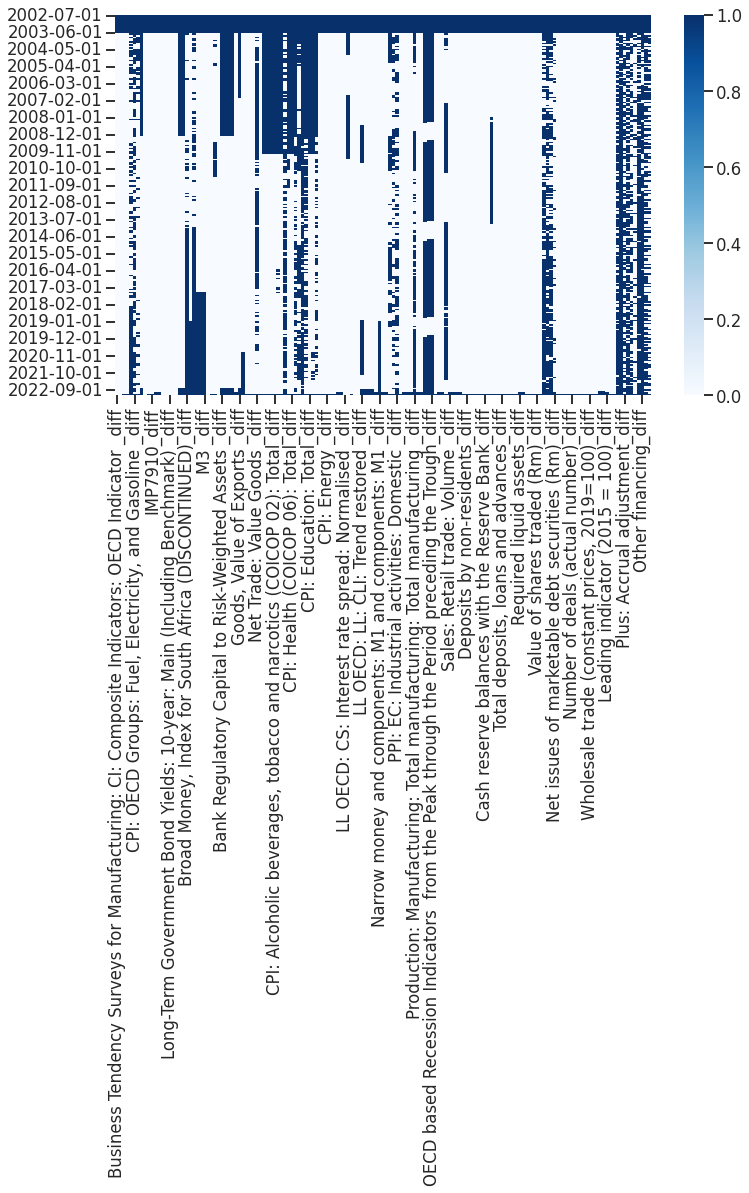

In [8]:
sns.heatmap(sa_macroeconomic_dataset.iloc[::, 155: 308].isnull(), cmap="Blues")
plt.show()  # detect and show missing values in the data set

# The Strategy used Impute Missing Economic Data of South Africa

Economic activities contained missing feature values. The $k$ nearest neighbor data imputation strategy imputed missing feature values with values in proximity to them.

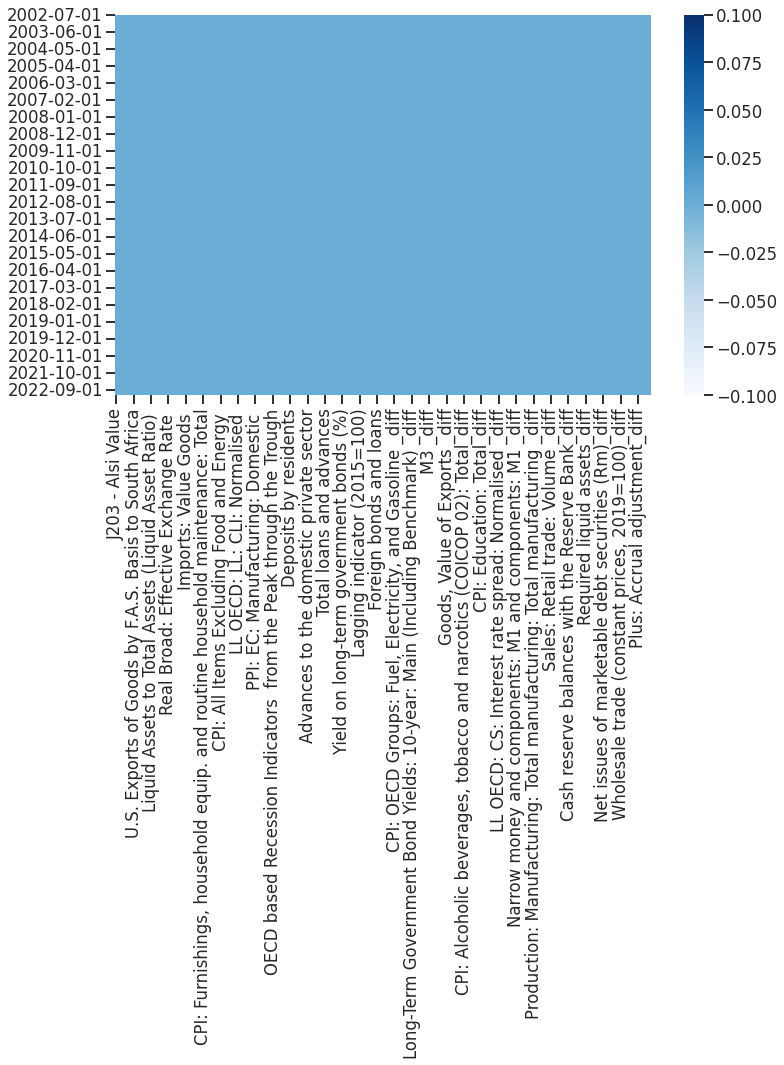

In [9]:
k_nearest_neighbor_imputer = KNNImputer(n_neighbors = 2) # specify n_neighbors = 2 to ensure the imputer apply a Euclidean distance estimator
sa_macroeconomic_imputed_dataset = pd.DataFrame(k_nearest_neighbor_imputer.fit_transform(sa_macroeconomic_dataset), columns = sa_macroeconomic_dataset.columns, index = sa_macroeconomic_dataset.index) # re-name column names and index
sns.heatmap(sa_macroeconomic_imputed_dataset.isnull(), cmap="Blues") # determine whether imputation was applied through visualization
plt.show()

# The Strategy used to Replace Outliers in Economic and Stock Market Returns Data of South Africa

Economic activities had varying sample periods. In this manner, features contained outliers. The $median$ outlier replacement strategy replaced outliers with the $median$ value.

In [10]:
for c in sa_macroeconomic_imputed_dataset.columns: 
    sa_macroeconomic_imputed_dataset[c] = np.where((sa_macroeconomic_imputed_dataset[c] > sa_macroeconomic_imputed_dataset[c].quantile(0.95)), sa_macroeconomic_imputed_dataset[c].median(), sa_macroeconomic_imputed_dataset[c]) # apply the median value to replace outliers (i.e., South Africa's macroeconomic feature values < 5% percentile or South Africa's macroeconomic feature values > 95% percentile) in the sample probability distribution 
    sa_macroeconomic_imputed_dataset[c] = np.where((sa_macroeconomic_imputed_dataset[c] < sa_macroeconomic_imputed_dataset[c].quantile(0.05)), sa_macroeconomic_imputed_dataset[c].median(), sa_macroeconomic_imputed_dataset[c]) # apply the median value to replace outliers (i.e., South Africa's macroeconomic feature values < 5% percentile or South Africa's macroeconomic feature values > 95% percentile) in the sample probability distribution 
    sa_macroeconomic_final_dataset = pd.DataFrame(sa_macroeconomic_imputed_dataset, columns = sa_macroeconomic_imputed_dataset.columns, index = sa_macroeconomic_imputed_dataset.index) # specify column names and index

# The Exploration of the Distribution of the Reaction of Stock Market Returns in South Africa

In [11]:
# obtain and tabulate the FTSE/JSE all-index log return and ADF p-value 
ftse_jse_alsi_adfullerreport = adfuller(sa_macroeconomic_final_dataset["J203 - Alsi Value_diff"])
ftse_jse_alsi_adfullerreportdata = pd.DataFrame(ftse_jse_alsi_adfullerreport[0:2], columns = ["FTSE/JSE ALSI price performance"], index = ["ADF F% statistics", "ADF p-value"])
# obtain and tabulate the FTSE/JSE all-index log return mean value
ftse_jse_alsi_mean = pd.DataFrame(pd.Series(sa_macroeconomic_final_dataset["J203 - Alsi Value_diff"].mean()), columns = ["Mean"])
ftse_jse_alsi_mean.index = ["FTSE/JSE ALSI price performance"]
ftse_jse_alsi_mean = ftse_jse_alsi_mean.transpose()
# obtain and tabulate the FTSE/JSE all-index log return skewness
ftse_jse_alsi_skew = pd.DataFrame(pd.Series(sa_macroeconomic_final_dataset["J203 - Alsi Value_diff"].skew()), columns = ["Skew"])
ftse_jse_alsi_skew.index = ["FTSE/JSE ALSI price performance"]
ftse_jse_alsi_skew = ftse_jse_alsi_skew.transpose()
# obtain and tabulate the FTSE/JSE all-index log return kurtosis
ftse_jse_alsi_kurtosis = pd.DataFrame(pd.Series(sa_macroeconomic_final_dataset["J203 - Alsi Value_diff"].kurtosis()), columns = ["Kurtosis"])
ftse_jse_alsi_kurtosis.index = ["FTSE/JSE ALSI price performance"]
ftse_jse_alsi_kurtosis = ftse_jse_alsi_kurtosis.transpose()
# obtain and tabulate the FTSE/JSE all-index return log standard deviation
ftse_jse_alsi_std = pd.DataFrame(pd.Series(sa_macroeconomic_final_dataset["J203 - Alsi Value_diff"].std()), columns = ["Std"])
ftse_jse_alsi_std.index = ["FTSE/JSE ALSI price performance"]
ftse_jse_alsi_std = ftse_jse_alsi_std.transpose()
# combine the FTSE/JSE all-index log return ADF P-value, mean, skewness, kurtosis, and standard deviation table
ftse_jse_alsi_descriptive_statistics = pd.concat([ftse_jse_alsi_mean, ftse_jse_alsi_std, ftse_jse_alsi_skew, ftse_jse_alsi_kurtosis, ftse_jse_alsi_adfullerreportdata])
# transpose the FTSE/JSE all-index log return exploratory descriptive statistics
ftse_jse_alsi_descriptive_statistics = ftse_jse_alsi_descriptive_statistics.transpose()

The table below shows the central tendency and dispersion of stock market returns in South Africa, i.e., 

$Mean$–The central value of the stock market returns in South Africa.

$Standard deviation$–The divergence of independent stock market returns from the \textit{mean} stock market returns in South Africa.

$Skew$–The inclination of independent stock market returns to a single stock market return (the $3^{rd}$ sample probability distribution moment).

$Kurtosis$–the sample probability distribution tail fatness (the $4^{th}$ the sample probability distribution moment).

It also shows the $p$ $value$ of the augmented Dickey-Fuller $(ADF)$ test, which infers temporal feature stationarity (at $\alpha$ = 0.05), where a $p$ $value$ < 0.05 denotes the stock market returns in South Africa are stationary, and $p$ $value$ > 0.05 denotes the feature is non-stationary.

In [12]:
ftse_jse_alsi_descriptive_statistics = round(ftse_jse_alsi_descriptive_statistics, 4)
ftse_jse_alsi_descriptive_statistics # show the FTSE/JSE all-index return series exploratory descriptive statistics table

,Mean,Std,Skew,Kurtosis,ADF F% statistics,ADF p-value
FTSE/JSE ALSI price performance,1.0105,0.0113,0.3357,-0.4565,-3.6158,0.0055


## Stock Market Returns Returns Series of South Africa

Figure below shows stock market returns in South Africa between 2002 and 2022

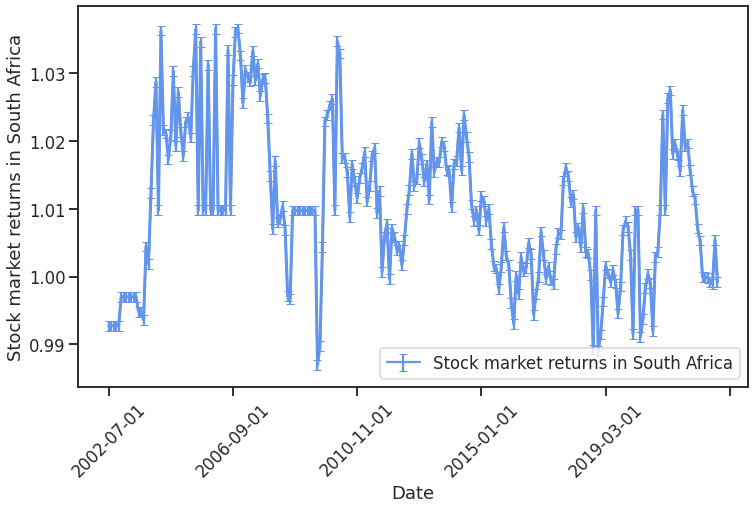

In [13]:
x_error=np.arange(len(sa_macroeconomic_final_dataset["J203 - Alsi Value_diff"]))
y_error=sa_macroeconomic_final_dataset["J203 - Alsi Value_diff"]
std_errors=np.std(sa_macroeconomic_final_dataset["J203 - Alsi Value_diff"], ddof=1) / np.sqrt(len(sa_macroeconomic_final_dataset["J203 - Alsi Value_diff"]))
fig=plt.figure()
sa_macroeconomic_final_dataset["J203 - Alsi Value_diff"].plot(lw=3, color="cornflowerblue", label="")
plt.errorbar(x_error, y_error, yerr=std_errors, capsize=4, color="cornflowerblue", label="Stock market returns in South Africa")
plt.xlabel("Date")
plt.ylabel("Stock market returns in South Africa")
plt.legend(loc=4)
plt.xticks(rotation=45)
plt.show() # show the FTSE/JSE all-index return series

## Stock Market Returns Returns Distribution of South Africa

Figure below shows the distribution of stock market returns in South Africa between 2002 and 2022.

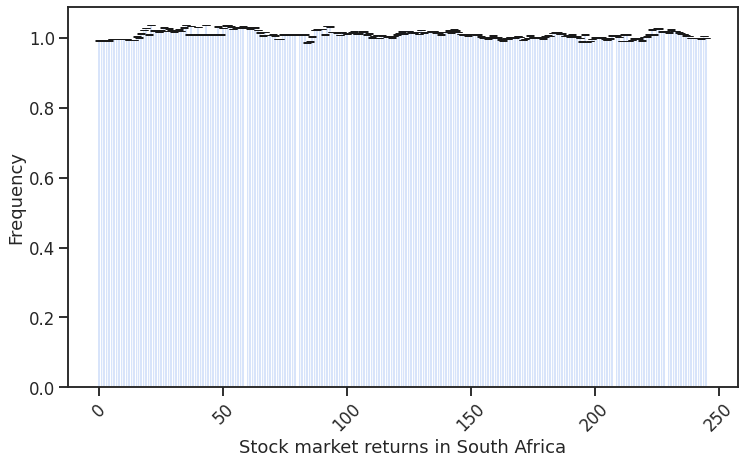

In [14]:
std_errors=np.std(sa_macroeconomic_final_dataset["J203 - Alsi Value_diff"], ddof=1) / np.sqrt(len(sa_macroeconomic_final_dataset["J203 - Alsi Value_diff"]))
fig=plt.figure()
plt.bar(x=np.arange(len(sa_macroeconomic_final_dataset["J203 - Alsi Value_diff"])), #x-coordinates of bars
       height=sa_macroeconomic_final_dataset["J203 - Alsi Value_diff"], #height of bars
       yerr=std_errors, #error bar width
       capsize=4, color="cornflowerblue")
plt.grid(False)
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.xlabel("Stock market returns in South Africa")
plt.show() # show the FTSE/JSE all-share time series distribution

# The Benchmark for Model Comparison

The vector autoregressive was universally regarded in South Africa’s equity market and system performance studies. As such, it was the benchmark for model comparison. 

In [15]:
sa_macroeconomic_cleansed_dataset=pd.DataFrame(sa_macroeconomic_final_dataset) # final the data set to be used in modelling 
scaler=StandardScaler() # call the standard scaler
x=sa_macroeconomic_final_dataset.iloc[::, 155: 308].values # assign x 
y=sa_macroeconomic_final_dataset.iloc[::, 154].values # assign y
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.1) # split data into training and test data
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
# develop default tree-based feature selection strategies (i.e., decision tree, random forest tree, and extreme gradient boosting tree)
dt_default_regression=DecisionTreeRegressor().fit(x_train,y_train)
rft_default_regression=RandomForestRegressor().fit(x_train,y_train)
xgbt_default_regression=XGBRegressor().fit(x_train,y_train)
# obtain and tabulate important South African macroeconomic features to the decision tree model
sorted_idx=dt_default_regression.feature_importances_.argsort()
importance_dt=pd.DataFrame(dt_default_regression.feature_importances_[sorted_idx], columns=["Importance"])
importance_dt.index=sa_macroeconomic_cleansed_dataset.iloc[::, 155: 308].columns[sorted_idx]
importance_dt_top_ten=importance_dt["Importance"].nlargest(n=10).sort_values()
# obtain and tabulate important South African macroeconomic features to the random forest tree model
sorted_idx=rft_default_regression.feature_importances_.argsort()
importance_rft=pd.DataFrame(rft_default_regression.feature_importances_[sorted_idx], columns=["Importance"])
importance_rft.index=sa_macroeconomic_cleansed_dataset.iloc[::, 155: 308].columns[sorted_idx]
importance_rft_top_ten=importance_rft["Importance"].nlargest(n=10).sort_values()
# obtain and tabulate important South African macroeconomic features to the extreme gradient boosting tree model
sorted_idx=xgbt_default_regression.feature_importances_.argsort()
importance_xgbt=pd.DataFrame(xgbt_default_regression.feature_importances_[sorted_idx], columns=["Importance"])
importance_xgbt.index=sa_macroeconomic_cleansed_dataset.iloc[::, 155: 308].columns[sorted_idx]
importance_xgbt_top_ten=importance_xgbt["Importance"].nlargest(n=10).sort_values()
# obtain the target feature to concat with important South African macroeconomic feature later
ftsejsealsi_feature=sa_macroeconomic_cleansed_dataset.iloc[::, 154]
count_importance_dt=importance_dt[importance_dt["Importance"] > 0.01]
count_importance_rft=importance_rft[importance_rft["Importance"] > 0.01]
count_importance_xgbt=importance_xgbt[importance_xgbt["Importance"] > 0.01]
feature_set_dt=pd.DataFrame(sa_macroeconomic_cleansed_dataset[count_importance_dt.index])
feature_set_rft=pd.DataFrame(sa_macroeconomic_cleansed_dataset[count_importance_rft.index])
feature_set_xgbt=pd.DataFrame(sa_macroeconomic_cleansed_dataset[count_importance_xgbt.index])
# create a data set containing important South African macroeconomic features to the decision tree model and the FTSE/JSE all-share index return (the target feature)
reduced_feature_set_dt=pd.concat([ftsejsealsi_feature, feature_set_dt], axis=1)
# create a data set containing important South African macroeconomic features to the random forest tree model and the FTSE/JSE all-share index return (the target feature)
reduced_feature_set_rft=pd.concat([ftsejsealsi_feature, feature_set_rft], axis=1)
# create a data set containing important South African macroeconomic features to the extreme gradient boosting tree model and the FTSE/JSE all-share index return (the target feature)
reduced_feature_set_xgbt=pd.concat([ftsejsealsi_feature, feature_set_xgbt], axis=1)

### The Selection of Important Economic Activities based on Gini Impurity Calculated by the Decision Tree Model when Predicting the Reaction of Stock Market Returns to Changing Economic Activities in South Africa

The decision tree model calculated $gini$ $impurity$ value to identify important economic activities when predicting the reaction of stock market returns to changing economic activities in South Africa. Following that, economic activities were ranked based on their importance to the model.

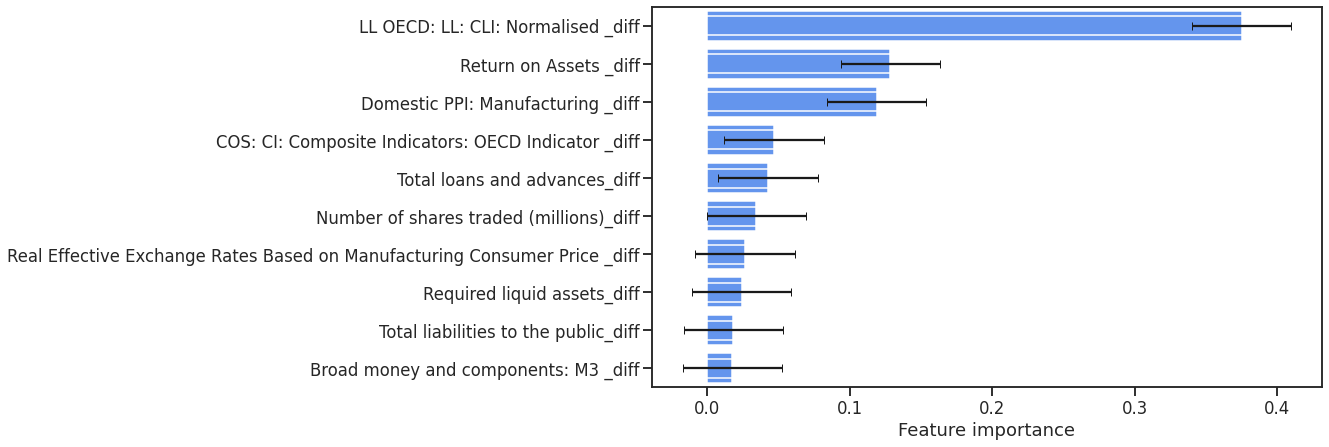

In [16]:
std_errors=np.std(importance_dt_top_ten, ddof=1) / np.sqrt(len(importance_dt_top_ten))
fig=plt.figure()
plt.barh(y=np.arange(len(importance_dt_top_ten)), #x-coordinates of bars
       width=importance_dt_top_ten, #height of bars
       xerr=std_errors, #error bar width
       capsize=4, color="cornflowerblue")
plt.grid(False)
importance_dt_top_ten.plot(kind="barh", color="cornflowerblue") 
plt.xlabel("Feature importance")
plt.show() # show important South African macroeconomic features to the decision tree model

### The Selection of Important Economic Activities based on Gini Impurity Calculated by the Random Forest Tree Model when Predicting the Reaction of Stock Market Returns to Changing Economic Activities in South Africa

The random forest tree model calculated $gini$ $impurity$ value to identify important economic activities when predicting the reaction of stock market returns to changing economic activities in South Africa. Following that, economic activities were ranked based on their importance to the model.

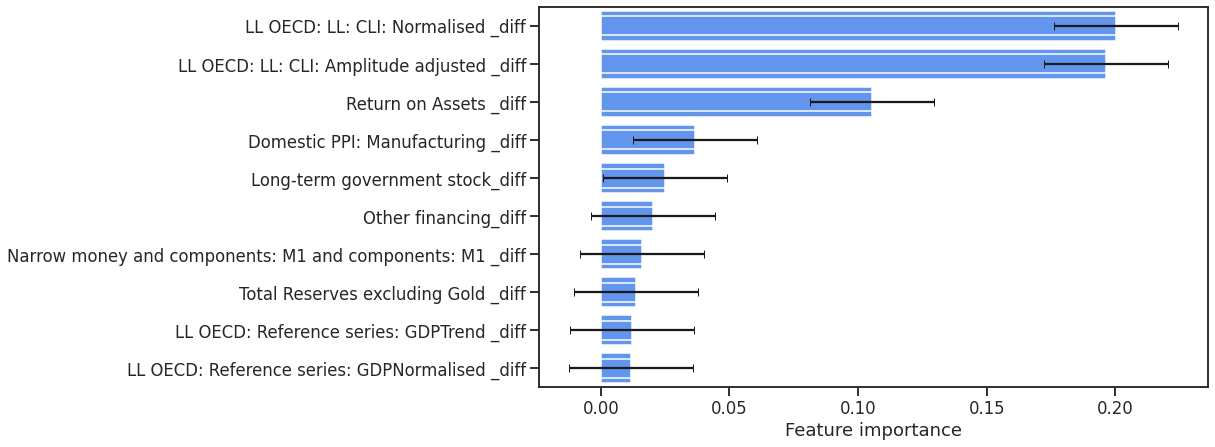

In [17]:
std_errors=np.std(importance_rft_top_ten, ddof=1) / np.sqrt(len(importance_rft_top_ten))
fig=plt.figure()
plt.barh(y=np.arange(len(importance_rft_top_ten)), #x-coordinates of bars
       width=importance_rft_top_ten, #height of bars
       xerr=std_errors, #error bar wirfth
       capsize=4, color="cornflowerblue")
plt.grid(False)
importance_rft_top_ten.plot(kind="barh", color="cornflowerblue")
plt.xlabel("Feature importance")
plt.show() # show important South African macroeconomic features to the random forest tree model

### The Selection of Important Economic Activities based on Gini Impurity Calculated by the Extreme Gradient Boosting Tree Model when Predicting the Reaction of Stock Market Returns to Changing Economic Activities in South Africa

The extreme gradient boosting tree model calculated $gini$ $impurity$ value to identify important economic activities when predicting the reaction of stock market returns to changing economic activities in South Africa. Following that, economic activities were ranked based on their importance to the model.

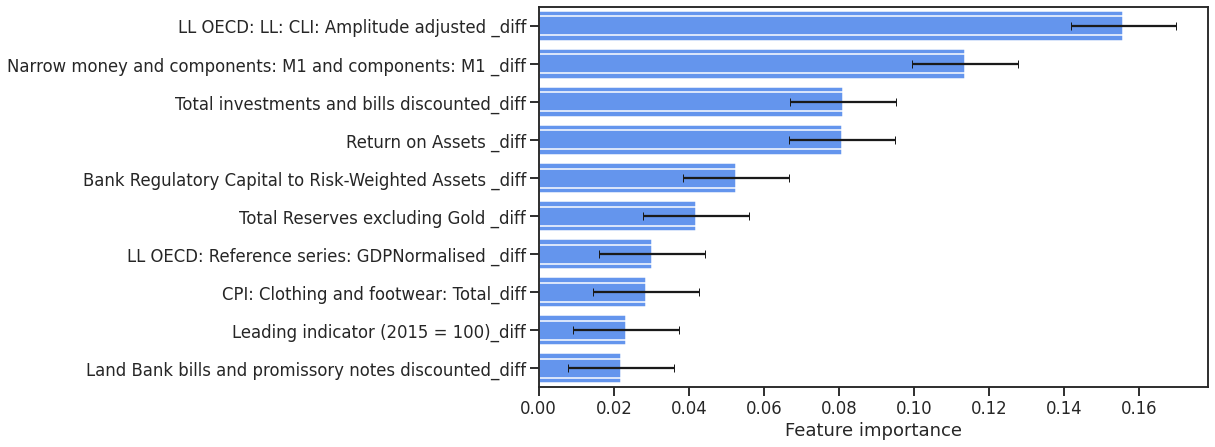

In [18]:
std_errors=np.std(importance_xgbt_top_ten, ddof=1) / np.sqrt(len(importance_xgbt_top_ten))
fig=plt.figure()
plt.barh(y=np.arange(len(importance_xgbt_top_ten)), #x-coordinates of bars
       width=importance_xgbt_top_ten, #height of bars
       xerr=std_errors, #error bar wixgbth
       capsize=4, color="cornflowerblue")
plt.grid(False)
importance_xgbt_top_ten.plot(kind="barh", color="cornflowerblue") 
plt.xlabel("Feature importance")
plt.show() # show important South African macroeconomic features to the extreme gradient boosting tree model

In [19]:
count_importance_dt

,Importance
Coincident indicator (2015=100)_diff,0.013589
Sales: Wholesale trade: Value _diff,0.014946
LL OECD: Reference series: GDPTrend _diff,0.015133
Long-term government stock_diff,0.015884
Broad money and components: M3 _diff,0.017571
Total liabilities to the public_diff,0.018194
Required liquid assets_diff,0.024081
Real Effective Exchange Rates Based on Manufacturing Consumer Price _diff,0.026551
Number of shares traded (millions)_diff,0.034324
Total loans and advances_diff,0.042608


In [20]:
count_importance_rft

,Importance
Coincident indicator (2015=100)_diff,0.010547
LL OECD: Reference series: GDPNormalised _diff,0.011807
LL OECD: Reference series: GDPTrend _diff,0.012140
Total Reserves excluding Gold _diff,0.013627
Narrow money and components: M1 and components: M1 _diff,0.015996
Other financing_diff,0.020142
Long-term government stock_diff,0.024819
Domestic PPI: Manufacturing _diff,0.036728
Return on Assets _diff,0.105387
LL OECD: LL: CLI: Amplitude adjusted _diff,0.196495


In [21]:
count_importance_xgbt

,Importance
Number of shares traded (millions)_diff,0.010090
Yield on long-term government bonds (%)_diff,0.010207
M2 _diff,0.011314
Advances to the domestic private sector_diff,0.011709
Imports: Value Goods _diff,0.013275
Total assets_diff,0.015063
Domestic PPI: Manufacturing _diff,0.016156
Broad money and components: M3 _diff,0.017533
"Goods, Value of Exports _diff",0.017840
Long-term government stock_diff,0.017992


# The Augment Dickey-Fuller Test

The augmented Dickey-Fuller $(ADF)$'s p-value, which inferred series stationarity (at $\alpha$ = 0.05), where a $p-value$ < 0.05 denotes stock market returns in South Africa are stationary, and $p-value$ > 0.05 denotes the series is non-stationary. 

In [22]:
# split the data into training and test set
def splitter(data_df):
    end=round(len(data_df)*0.9875)
    train_df=data_df[:end]
    test_df=data_df[end:]
    return train_df, test_df
train_df, test_df=splitter(reduced_feature_set_dt.iloc[::, 0:10]) # obtain the training and test data set
# perform the adf test
def adf_test(data_df):
    test_stat, p_val=[], []
    cv_1pct, cv_5pct, cv_10pct=[], [], []
    for c in data_df.columns: 
        adf_res=adfuller(data_df[c].dropna())
        test_stat.append(adf_res[0])
        p_val.append(adf_res[1]) # obtain P-value
        cv_1pct.append(adf_res[4]["1%"]) # obtain the critical value at -1%
        cv_5pct.append(adf_res[4]["5%"]) # obtain the critical value at -5%
        cv_10pct.append(adf_res[4]["10%"]) # obtain the critical value at 10% 
    adf_res_df=pd.DataFrame({"Test statistic": test_stat,  "P-value": p_val,  "Critical value - 1%": cv_1pct, "Critical value - 5%": cv_5pct, "Critical value - 10%": cv_10pct}, index=data_df.columns).T
    return adf_res_df
adf_test_results=adf_test(reduced_feature_set_dt.iloc[::, 0:10]) # obtain adf results for features most important to the decision tree 
adf_test_results=round(adf_test_results, 4)
adf_test_results

,J203 - Alsi Value_diff,Coincident indicator (2015=100)_diff,Sales: Wholesale trade: Value _diff,LL OECD: Reference series: GDPTrend _diff,Long-term government stock_diff,Broad money and components: M3 _diff,Total liabilities to the public_diff,Required liquid assets_diff,Real Effective Exchange Rates Based on Manufacturing Consumer Price _diff,Number of shares traded (millions)_diff
Test statistic,-3.6158,-3.6365,-2.9022,-2.0906,-4.0299,-4.2033,-1.6027,-3.1063,-5.2419,-5.1593
P-value,0.0055,0.0051,0.0451,0.2483,0.0013,0.0007,0.4823,0.0261,0.0000,0.0000
Critical value - 1%,-3.4577,-3.4574,-3.4580,-3.4578,-3.4587,-3.4590,-3.4591,-3.4580,-3.4573,-3.4586
Critical value - 5%,-2.8736,-2.8735,-2.8737,-2.8736,-2.8740,-2.8741,-2.8742,-2.8737,-2.8734,-2.8740
Critical value - 10%,-2.5732,-2.5731,-2.5733,-2.5732,-2.5734,-2.5735,-2.5735,-2.5733,-2.5731,-2.5734


# The Granger-Causal Relationship between Economic Activities and Stock Market Returns in South Africa

The table below shows $p$ $values$ of the Granger-Causality test about the causal relationship between selected economic activities and the stock market returns in South Africa, whereby a $p$ $values$ < 0.05 entails Granger-Causality among features, and a $p$ $values$ > 0.05 entails no Granger-Causality among features.

In [23]:
p=8 # specify the order
model=VAR(train_df) # specify the the vector autoregressive model
var_model=model.fit(p) # fit the vector autoregressive model
# perform Granger-Causality test among South African macroeconomic features
def granger_causation_matrix(data, variables, p, test='ssr_chi2test', verbose=False): 
    df=pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result=grangercausalitytests(data[[r, c]], p, verbose=False)
            p_values=[round(test_result[i+1][0][test][1],4) for i in range(p)]
            if verbose: print(f'Y={r}, X={c}, P Values={p_values}')
            min_p_value=np.min(p_values)
            df.loc[r, c]=min_p_value
    df.columns=[var + '_x' for var in variables] # specify feature names as column names
    df.index=[var + '_y' for var in variables] # specify feature names as index names
    return df
sa_macroceonomic_granger_causation_matrix=granger_causation_matrix(train_df, train_df.columns, p)
sa_macroceonomic_granger_causation_matrix=round(sa_macroceonomic_granger_causation_matrix, 4)
sa_macroceonomic_granger_causation_matrix # show the Granger-Causality among South African macroeconomic features

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,J203 - Alsi Value_diff_x,Coincident indicator (2015=100)_diff_x,Sales: Wholesale trade: Value _diff_x,LL OECD: Reference series: GDPTrend _diff_x,Long-term government stock_diff_x,Broad money and components: M3 _diff_x,Total liabilities to the public_diff_x,Required liquid assets_diff_x,Real Effective Exchange Rates Based on Manufacturing Consumer Price _diff_x,Number of shares traded (millions)_diff_x
J203 - Alsi Value_diff_y,1.0000,0.0500,0.0163,0.0027,0.0472,0.3143,0.1244,0.0660,0.8230,0.4134
Coincident indicator (2015=100)_diff_y,0.0001,1.0000,0.1957,0.2711,0.1442,0.1034,0.5286,0.8887,0.3102,0.0276
Sales: Wholesale trade: Value _diff_y,0.0043,0.0000,1.0000,0.0003,0.3358,0.0772,0.0580,0.0311,0.4313,0.1157
LL OECD: Reference series: GDPTrend _diff_y,0.3339,0.0408,0.0396,1.0000,0.1201,0.0756,0.1065,0.0314,0.6256,0.6680
Long-term government stock_diff_y,0.0139,0.0049,0.0888,0.1613,1.0000,0.1297,0.0007,0.0894,0.5912,0.1686
Broad money and components: M3 _diff_y,0.0332,0.0007,0.0142,0.3642,0.4706,1.0000,0.1902,0.2288,0.1049,0.2237
Total liabilities to the public_diff_y,0.0033,0.0262,0.0287,0.0008,0.0000,0.3392,1.0000,0.0001,0.0887,0.2822
Required liquid assets_diff_y,0.5282,0.1685,0.1077,0.0431,0.0096,0.1919,0.0000,1.0000,0.3623,0.2366
Real Effective Exchange Rates Based on Manufacturing Consumer Price _diff_y,0.0700,0.0045,0.0695,0.2368,0.3477,0.0882,0.7771,0.0789,1.0000,0.6431
Number of shares traded (millions)_diff_y,0.3490,0.1124,0.0017,0.0057,0.2584,0.0012,0.0199,0.4887,0.0168,1.0000


# The Performance of the Vector Autoregressive Model when Predicting the Reaction of Stock Market Returns to Changing Economic Activities in South Africa

The table below shows the performance of the vector autoregressive model when forecasting the reaction of stock market returns to changing economic activities in South Africa

In [24]:
sa_macroeconomic_cleansed_dataset.index.name="date" # specify date as the index name
h1_start_date="2020-12-01" # specify the start date
h1_end_date="2022-12-01" # specify the end date
# develop the vector autoregressive model
def h1_var_create(columns, data):
    data=data[columns]
    data=data.dropna(axis=0)
    data.index=pd.to_datetime(data.index)
    data.index.to_period("M")
    # Split dataset and run VAR on the trained part
    data_train=data.loc["2002-07-01":"2020-11-01", :]
    var_train=VAR(data_train)
    results=var_train.fit(1)
    lag_order=results.k_ar
    forecasted=pd.DataFrame(results.forecast(data_train.values[-lag_order:], 3)) # Forecast 3 months
    # Rename forecasted columns
    forecasted_names=list(forecasted.columns.values)
    data_train_names=list(data_train.columns.values)
    var_dict=dict(zip(forecasted_names, data_train_names))
    for f,t in var_dict.items():
        forecasted=forecasted.rename(columns={f:t + "_fcast"})
    forecasted.index=pd.date_range(start=h1_start_date, periods=forecasted.shape[0], freq="MS")
    forecasted.index.names=["date"]
    # Parse together forecasted data with original dataset
    final_data=pd.merge(forecasted, data, left_index=True, right_index=True)
    final_data=final_data.sort_index(axis=0, ascending=True)
    final_data=pd.concat([data_train, final_data], sort=True, axis=0)
    final_data=final_data.sort_index(axis=0, ascending=True)
    var_mape=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(final_data.loc[h1_start_date:h1_end_date,"J203 - Alsi Value_diff_fcast"],  final_data.loc[h1_start_date:h1_end_date,"J203 - Alsi Value_diff"])), columns=["Mean Absolute Percentage Error"])
    return var_mape, final_data
h1_var_mape_results_default, h1_var_mape_results_default_data=h1_var_create(columns=sa_macroeconomic_cleansed_dataset.iloc[::, 154: 308].columns, data=sa_macroeconomic_cleansed_dataset.iloc[::, 154: 308]) # obtain the performance appraisal results of the vector autoregressive model
h1_var_mape_results_default.index=["Default"] # specify index name
h1_var_mape_results_default=h1_var_mape_results_default.reset_index() # reset index
h1_var_mape_results_default.columns=["Feature Selection", "H1"] # specify column name
dt_imp_features_list=pd.DataFrame(count_importance_dt).index
dt_imp_features_list=dt_imp_features_list.append(pd.Index(["J203 - Alsi Value_diff"]))  
h1_var_mape_results_w_dt_imp_features, h1_var_mape_results_w_dt_imp_features_data=h1_var_create(columns=dt_imp_features_list, data=sa_macroeconomic_final_dataset.iloc[::,154:308])
h1_var_mape_results_w_dt_imp_features.index=["DT"]
h1_var_mape_results_w_dt_imp_features=h1_var_mape_results_w_dt_imp_features.reset_index()
h1_var_mape_results_w_dt_imp_features.columns=["Feature Selection", "H1"]
# obtain the performance appraisal results of the vector autoregressive model trained w only important features to the random forest tree
rft_imp_features_list=pd.DataFrame(count_importance_dt).index
rft_imp_features_list=rft_imp_features_list.append(pd.Index(["J203 - Alsi Value_diff"]))  
h1_var_mape_results_w_rft_imp_features, h1_var_mape_results_w_rft_imp_features_data=h1_var_create(columns=rft_imp_features_list, data=sa_macroeconomic_final_dataset.iloc[::,154:308])
h1_var_mape_results_w_rft_imp_features.index=["RFT"]
h1_var_mape_results_w_rft_imp_features=h1_var_mape_results_w_rft_imp_features.reset_index()
h1_var_mape_results_w_rft_imp_features.columns=["Feature Selection", "H1"]
# obtain the performance appraisal results of the vector autoregressive model trained w only important features to the extreme gradient boosting tree
xgbt_imp_features_list=pd.DataFrame(count_importance_dt).index
xgbt_imp_features_list=xgbt_imp_features_list.append(pd.Index(["J203 - Alsi Value_diff"]))  
h1_var_mape_results_w_xgbt_imp_features, h1_var_mape_results_w_xgbt_imp_features_data=h1_var_create(columns=xgbt_imp_features_list, data=sa_macroeconomic_final_dataset.iloc[::,154:308])
h1_var_mape_results_w_xgbt_imp_features.index=["XGBT"]
h1_var_mape_results_w_xgbt_imp_features=h1_var_mape_results_w_xgbt_imp_features.reset_index()
h1_var_mape_results_w_xgbt_imp_features.columns=["Feature Selection", "H1"]
# concate the performance appraisal results of all vector autoregressive models
all_h1_var_mape_results=pd.concat([h1_var_mape_results_default, h1_var_mape_results_w_dt_imp_features, h1_var_mape_results_w_rft_imp_features, h1_var_mape_results_w_xgbt_imp_features])
all_h1_var_mape_results.index=["VAR", "VAR", "VAR", "VAR"]
h2_start_date="2022-01-01" # specify the start date
h2_end_date="2022-12-01" # specify the end date
# develop the vector autoregressive model
def h2_var_create(columns, data):
    data=data[columns]
    data=data.dropna(axis=0)
    data.index=pd.to_datetime(data.index)
    data.index.to_period("M")
    # Split dataset and run VAR on the trained part
    data_train=data.loc["2002-07-01":"2021-12-01", :]
    var_train=VAR(data_train)
    results=var_train.fit(1)
    lag_order=results.k_ar
    forecasted=pd.DataFrame(results.forecast(data_train.values[-lag_order:], 6)) # Forecast 6 months
    # Rename forecasted columns
    forecasted_names=list(forecasted.columns.values)
    data_train_names=list(data_train.columns.values)
    var_dict=dict(zip(forecasted_names, data_train_names))
    for f,t in var_dict.items():
        forecasted=forecasted.rename(columns={f:t + "_fcast"})
    forecasted.index=pd.date_range(start=h2_start_date, periods=forecasted.shape[0], freq="MS")
    forecasted.index.names=["date"]
    # Parse together forecasted data with original dataset
    final_data=pd.merge(forecasted, data, left_index=True, right_index=True)
    final_data=final_data.sort_index(axis=0, ascending=True)
    final_data=pd.concat([data_train, final_data], sort=True, axis=0)
    final_data=final_data.sort_index(axis=0, ascending=True)
    var_mape=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(final_data.loc[h2_start_date:h2_end_date,"J203 - Alsi Value_diff_fcast"],  final_data.loc[h2_start_date:h2_end_date,"J203 - Alsi Value_diff"])), columns=["Mean Absolute Percentage Error"])
    return var_mape, final_data
h2_var_mape_results_default, h2_var_mape_results_default_data=h2_var_create(columns=sa_macroeconomic_cleansed_dataset.iloc[::, 154: 308].columns, data=sa_macroeconomic_cleansed_dataset.iloc[::, 154: 308]) # obtain the performance appraisal results of the vector autoregressive model
h2_var_mape_results_default.index=["Default"] # specify index name
h2_var_mape_results_default=h2_var_mape_results_default.reset_index() # reset index
h2_var_mape_results_default.columns=["Feature Selection", "H2"] # specify column name
h2_var_mape_results_w_dt_imp_features, h2_var_mape_results_w_dt_imp_features_data=h2_var_create(columns=dt_imp_features_list, data=sa_macroeconomic_final_dataset.iloc[::,154:308])
h2_var_mape_results_w_dt_imp_features.index=["DT"]
h2_var_mape_results_w_dt_imp_features=h2_var_mape_results_w_dt_imp_features.reset_index()
h2_var_mape_results_w_dt_imp_features.columns=["Feature Selection", "H2"]
# obtain the performance appraisal results of the vector autoregressive model trained w only important features to the random forest tree
h2_var_mape_results_w_rft_imp_features, h2_var_mape_results_w_rft_imp_features_data=h2_var_create(columns=rft_imp_features_list, data=sa_macroeconomic_final_dataset.iloc[::,154:308])
h2_var_mape_results_w_rft_imp_features.index=["RFT"]
h2_var_mape_results_w_rft_imp_features=h2_var_mape_results_w_rft_imp_features.reset_index()
h2_var_mape_results_w_rft_imp_features.columns=["Feature Selection", "H2"]
# obtain the performance appraisal results of the vector autoregressive model trained w only important features to the extreme gradient boosting tree
h2_var_mape_results_w_xgbt_imp_features, h2_var_mape_results_w_xgbt_imp_features_data=h2_var_create(columns=xgbt_imp_features_list, data=sa_macroeconomic_final_dataset.iloc[::,154:308])
h2_var_mape_results_w_xgbt_imp_features.index=["XGBT"]
h2_var_mape_results_w_xgbt_imp_features=h2_var_mape_results_w_xgbt_imp_features.reset_index()
h2_var_mape_results_w_xgbt_imp_features.columns=["Feature Selection", "H2"]
# concate the performance appraisal results of all vector autoregressive models
all_h2_var_mape_results=pd.concat([h2_var_mape_results_default, h2_var_mape_results_w_dt_imp_features, h2_var_mape_results_w_rft_imp_features, h2_var_mape_results_w_xgbt_imp_features])
all_h2_var_mape_results.index=["VAR", "VAR", "VAR", "VAR"]
h3_start_date="2022-07-01" # specify the start date
h3_end_date="2022-12-01" # specify the end date
# develop the vector autoregressive model
def h3_var_create(columns, data):
    data=data[columns]
    data=data.dropna(axis=0)
    data.index=pd.to_datetime(data.index)
    data.index.to_period("M")
    # Split dataset and run VAR on the trained part
    data_train=data.loc["2002-07-01":"2022-06-01", :]
    var_train=VAR(data_train)
    results=var_train.fit(1)
    lag_order=results.k_ar
    forecasted=pd.DataFrame(results.forecast(data_train.values[-lag_order:], 12)) # Forecast 12 months
    # Rename forecasted columns
    forecasted_names=list(forecasted.columns.values)
    data_train_names=list(data_train.columns.values)
    var_dict=dict(zip(forecasted_names, data_train_names))
    for f,t in var_dict.items():
        forecasted=forecasted.rename(columns={f:t + "_fcast"})
    forecasted.index=pd.date_range(start=h3_start_date, periods=forecasted.shape[0], freq="MS")
    forecasted.index.names=["date"]
    # Parse together forecasted data with original dataset
    final_data=pd.merge(forecasted, data, left_index=True, right_index=True)
    final_data=final_data.sort_index(axis=0, ascending=True)
    final_data=pd.concat([data_train, final_data], sort=True, axis=0)
    final_data=final_data.sort_index(axis=0, ascending=True)
    var_mape=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(final_data.loc[h3_start_date:h3_end_date,"J203 - Alsi Value_diff_fcast"],  final_data.loc[h3_start_date:h3_end_date,"J203 - Alsi Value_diff"])), columns=["Mean Absolute Percentage Error"])
    return var_mape, final_data
h3_var_mape_results_default, h3_var_mape_results_default_data=h3_var_create(columns=sa_macroeconomic_cleansed_dataset.iloc[::, 154: 308].columns, data=sa_macroeconomic_cleansed_dataset.iloc[::, 154: 308]) # obtain the performance appraisal results of the vector autoregressive model
h3_var_mape_results_default.index=["Default"] # specify index name
h3_var_mape_results_default=h3_var_mape_results_default.reset_index() # reset index
h3_var_mape_results_default.columns=["Feature Selection", "H3"] # specify column name
h3_var_mape_results_w_dt_imp_features, h3_var_mape_results_w_dt_imp_features_data=h3_var_create(columns=dt_imp_features_list, data=sa_macroeconomic_final_dataset.iloc[::,154:308])
h3_var_mape_results_w_dt_imp_features.index=["DT"]
h3_var_mape_results_w_dt_imp_features=h3_var_mape_results_w_dt_imp_features.reset_index()
h3_var_mape_results_w_dt_imp_features.columns=["Feature Selection", "H3"]
# obtain the performance appraisal results of the vector autoregressive model trained w only important features to the random forest tree
h3_var_mape_results_w_rft_imp_features, h3_var_mape_results_w_rft_imp_features_data=h3_var_create(columns=rft_imp_features_list, data=sa_macroeconomic_final_dataset.iloc[::,154:308])
h3_var_mape_results_w_rft_imp_features.index=["RFT"]
h3_var_mape_results_w_rft_imp_features=h3_var_mape_results_w_rft_imp_features.reset_index()
h3_var_mape_results_w_rft_imp_features.columns=["Feature Selection", "H3"]
# obtain the performance appraisal results of the vector autoregressive model trained w only important features to the extreme gradient boosting tree
h3_var_mape_results_w_xgbt_imp_features, h3_var_mape_results_w_xgbt_imp_features_data=h3_var_create(columns=xgbt_imp_features_list, data=sa_macroeconomic_final_dataset.iloc[::,154:308])
h3_var_mape_results_w_xgbt_imp_features.index=["XGBT"]
h3_var_mape_results_w_xgbt_imp_features=h3_var_mape_results_w_xgbt_imp_features.reset_index()
h3_var_mape_results_w_xgbt_imp_features.columns=["Feature Selection", "H3"]
# concate the performance appraisal results of all vector autoregressive models
all_h3_var_mape_results=pd.concat([h3_var_mape_results_default, h3_var_mape_results_w_dt_imp_features, h3_var_mape_results_w_rft_imp_features, h3_var_mape_results_w_xgbt_imp_features])
all_h3_var_mape_results.index=["VAR", "VAR", "VAR", "VAR"]
h4_start_date="2020-12-01" # specify the start date
h4_end_date="2022-12-01" # specify the end date
# develop the vector autoregressive model
def h4_var_create(columns, data):
    data=data[columns]
    data=data.dropna(axis=0)
    data.index=pd.to_datetime(data.index)
    data.index.to_period("M")
    # Split dataset and run VAR on the trained part
    data_train=data.loc["2002-07-01":"2020-11-01", :]
    var_train=VAR(data_train)
    results=var_train.fit(1)
    lag_order=results.k_ar
    forecasted=pd.DataFrame(results.forecast(data_train.values[-lag_order:], 24)) # Forecast 120 months
    # Rename forecasted columns
    forecasted_names=list(forecasted.columns.values)
    data_train_names=list(data_train.columns.values)
    var_dict=dict(zip(forecasted_names, data_train_names))
    for f,t in var_dict.items():
        forecasted=forecasted.rename(columns={f:t + "_fcast"})
    forecasted.index=pd.date_range(start=h4_start_date, periods=forecasted.shape[0], freq="MS")
    forecasted.index.names=["date"]
    # Parse together forecasted data with original dataset
    final_data=pd.merge(forecasted, data, left_index=True, right_index=True)
    final_data=final_data.sort_index(axis=0, ascending=True)
    final_data=pd.concat([data_train, final_data], sort=True, axis=0)
    final_data=final_data.sort_index(axis=0, ascending=True)
    var_mape=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(final_data.loc[h4_start_date:h4_end_date,"J203 - Alsi Value_diff_fcast"],  final_data.loc[h4_start_date:h4_end_date,"J203 - Alsi Value_diff"])), columns=["Mean Absolute Percentage Error"])
    return var_mape, final_data
h4_var_mape_results_default, h4_var_mape_results_default_data=h4_var_create(columns=sa_macroeconomic_cleansed_dataset.iloc[::, 154: 308].columns, data=sa_macroeconomic_cleansed_dataset.iloc[::, 154: 308]) # obtain the performance appraisal results of the vector autoregressive model
h4_var_mape_results_default.index=["Default"] # specify index name
h4_var_mape_results_default=h4_var_mape_results_default.reset_index() # reset index
h4_var_mape_results_default.columns=["Feature Selection", "H4"] # specify column name
h4_var_mape_results_w_dt_imp_features, h4_var_mape_results_w_dt_imp_features_data=h4_var_create(columns=dt_imp_features_list, data=sa_macroeconomic_final_dataset.iloc[::,154:308])
h4_var_mape_results_w_dt_imp_features.index=["DT"]
h4_var_mape_results_w_dt_imp_features=h4_var_mape_results_w_dt_imp_features.reset_index()
h4_var_mape_results_w_dt_imp_features.columns=["Feature Selection", "H4"]
# obtain the performance appraisal results of the vector autoregressive model trained w only important features to the random forest tree
h4_var_mape_results_w_rft_imp_features, h4_var_mape_results_w_rft_imp_features_data=h4_var_create(columns=rft_imp_features_list, data=sa_macroeconomic_final_dataset.iloc[::,154:308])
h4_var_mape_results_w_rft_imp_features.index=["RFT"]
h4_var_mape_results_w_rft_imp_features=h4_var_mape_results_w_rft_imp_features.reset_index()
h4_var_mape_results_w_rft_imp_features.columns=["Feature Selection", "H4"]
# obtain the performance appraisal results of the vector autoregressive model trained w only important features to the extreme gradient boosting tree
h4_var_mape_results_w_xgbt_imp_features, h4_var_mape_results_w_xgbt_imp_features_data=h4_var_create(columns=xgbt_imp_features_list, data=sa_macroeconomic_final_dataset.iloc[::,154:308])
h4_var_mape_results_w_xgbt_imp_features.index=["XGBT"]
h4_var_mape_results_w_xgbt_imp_features=h4_var_mape_results_w_xgbt_imp_features.reset_index()
h4_var_mape_results_w_xgbt_imp_features.columns=["Feature Selection", "H4"]
# concate the performance appraisal results of all vector autoregressive models
all_h4_var_mape_results=pd.concat([h4_var_mape_results_default, h4_var_mape_results_w_dt_imp_features, h4_var_mape_results_w_rft_imp_features, h4_var_mape_results_w_xgbt_imp_features])
all_h4_var_mape_results.index=["VAR", "VAR", "VAR", "VAR"]
combined_var_mape_results=pd.concat([all_h1_var_mape_results, all_h3_var_mape_results, all_h3_var_mape_results, all_h4_var_mape_results],axis=1)
combined_var_mape_results=combined_var_mape_results.loc[:,combined_var_mape_results.columns.str.startswith('H')]
combined_var_mape_results.index=["Default", "DT", "RFT", "XGBT"]
combined_var_mape_results=combined_var_mape_results.reset_index()
combined_var_mape_results.index=["VAR", "VAR", "VAR", "VAR"]
combined_var_mape_results.rename(columns={"index":"Feature Selection"})
combined_var_mape_results['AVG MAPE']=combined_var_mape_results.mean(axis=1)
combined_var_mape_results

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

,index,H1,H3,H3,H4,AVG MAPE
VAR,Default,0.022604,0.004828,0.004828,0.029785,0.015511
VAR,DT,0.008941,0.007010,0.007010,0.010541,0.008375
VAR,RFT,0.008941,0.007010,0.007010,0.010541,0.008375
VAR,XGBT,0.008941,0.007010,0.007010,0.010541,0.008375


# The Performance of Default Machine Learning Models when Predicting the Reaction of Stock Market Returns to Changing Economic Activities in South Africa

Supervised machine learning models predicted the reaction of stock market returns to changing economic activities in South Africa over four periods. Applied machine learning models include basic regression models (i.e., the ordinary least-squares model, ridge model, and least-squares operator model) along with tree-based models (i.e., the decision tree model, random forest tree model, and extreme gradient boosting tree model) and neural networks (i.e., the recurrent neural network, gated recurrent unit, long short-term memory, restricted Boltzmann machine, and multilayer perceptron).

In [25]:
x=pd.DataFrame(sa_macroeconomic_cleansed_dataset.iloc[::, 155: 308]).columns # assign South Africa’s macroeconomic features' columns (predictor features)
y=pd.DataFrame(sa_macroeconomic_cleansed_dataset.iloc[::, 154]).columns # assign the FTSE/JSE all-share index price performance columns (the target feature)
# list applied machine learning models
OLS=LinearRegression(fit_intercept=False) # ordinary least-squares
RBM=BernoulliRBM(n_components=2) # Bernoulli RBM metwork
BernoulliRBMModel=Pipeline(steps=[("RBM", RBM), ("OLS", OLS)])
regression_based_models_list={"OLS": LinearRegression(), # ordinary least-squares model
                              "Ridge": Ridge(), # ridge model
                              "Lasso": Lasso(), # lasso model
                              "ElasticNet": ElasticNet()} # elasticnet model
tree_based_models_list={"DT": DecisionTreeRegressor(), # decision tree model
                          "RFT": RandomForestRegressor(), # random forest tree model
                          "XGBT": XGBRegressor()} # extreme gradient boosting tree model
neural_networks_list={"RBM": BernoulliRBMModel, # restricted boltzmann machine
                        "MLP": MLPRegressor()} # multi-layer perceptron
all_models_list={"OLS": LinearRegression(), # ordinary least-squares model
                   "Ridge": Ridge(), # ridge model
                   "Lasso": Lasso(), # lasso model
                   "ElasticNet": ElasticNet(), # elasticnet model
                   "DT": DecisionTreeRegressor(), # decision tree model
                   "RFT": RandomForestRegressor(), # random forest tree model
                   "XGBT": XGBRegressor(), # extreme gradient boosting tree model
                   "Ridge": Ridge(), # Rrdge
                   "Lasso": Lasso(), # lasse
                   "ElasticNet": ElasticNet(), # elasticnet
                   "RBM": BernoulliRBMModel, # restricted boltzmann machine
                   "MLP": MLPRegressor()} #  multi-layer perceptron

In [26]:
scaler=StandardScaler()
def default_models_experiment(models, data, test_size_split_ratio, iterations=1):
    results={}
    for i in models:
        r_sqaured=[]
        mean_absolute_error=[]
        mean_squared_error=[]
        root_mean_squared_error=[]
        mean_absolute_percentage_error=[]
        for j in range(iterations):
            end=round(len(data)*test_size_split_ratio)
            x_train=data.iloc[::, 155: 308][:end]
            y_train=data.iloc[::, 154][:end]
            x_test=data.iloc[::, 155: 308][end:]
            y_test=data.iloc[::, 154][end:]
            x_train=scaler.fit_transform(x_train)
            x_test=scaler.transform(x_test)
            r_sqaured.append(metrics.r2_score(y_test, models[i].fit(x_train, y_train).predict(x_test)))
            mean_absolute_error.append(metrics.mean_absolute_error(y_test, models[i].fit(x_train, y_train).predict(x_test)))
            mean_squared_error.append(metrics.mean_squared_error(y_test, models[i].fit(x_train, y_train).predict(x_test)))
            root_mean_squared_error=np.sqrt(mean_squared_error)
            mean_absolute_percentage_error.append(metrics.mean_absolute_percentage_error(y_test, models[i].fit(x_train, y_train).predict(x_test)))
        results[i]=mean_absolute_error, mean_absolute_percentage_error,  mean_squared_error, root_mean_squared_error, r_sqaured
        results=pd.DataFrame(results, index=["MAE", "MAPE", "MSE", "RMSE", "R2"])
    return pd.DataFrame(results)
def default_model_performance_appraisal_results(models_list, data):
    default_models_h1_performance_appraisal=default_models_experiment(models_list, data, 0.9875).transpose()
    default_models_h1_performance_appraisal=pd.DataFrame(default_models_h1_performance_appraisal["MAPE"])
    default_models_h1_performance_appraisal.columns=["H1"]
    default_models_h2_performance_appraisal=default_models_experiment(models_list, data, 0.975).transpose()
    default_models_h2_performance_appraisal=pd.DataFrame(default_models_h2_performance_appraisal["MAPE"])
    default_models_h2_performance_appraisal.columns=["H2"]
    default_models_h3_performance_appraisal=default_models_experiment(models_list, data, 0.95).transpose()
    default_models_h3_performance_appraisal=pd.DataFrame(default_models_h3_performance_appraisal["MAPE"])
    default_models_h3_performance_appraisal.columns=["H3"]
    default_models_h4_performance_appraisal=default_models_experiment(models_list, data, 0.9).transpose()
    default_models_h4_performance_appraisal=pd.DataFrame(default_models_h4_performance_appraisal["MAPE"])
    default_models_h4_performance_appraisal.columns=["H4"]
    default_models_performance_appraisal=pd.concat([default_models_h1_performance_appraisal, default_models_h2_performance_appraisal, default_models_h3_performance_appraisal, default_models_h4_performance_appraisal], axis=1)
    default_models_performance_appraisal=remove_brackets_seperator(default_models_performance_appraisal)
    default_models_performance_appraisal['AVG MAPE']=default_models_performance_appraisal.mean(axis=1)
    default_models_performance_appraisal=round(default_models_performance_appraisal, 4)
    return default_models_performance_appraisal
sa_macroeconomic_cleansed_dataset_2=sa_macroeconomic_cleansed_dataset.iloc[::, 154: 308]
for feature in list(sa_macroeconomic_cleansed_dataset_2.columns.values):
    scaler=StandardScaler()
    scaler.fit( sa_macroeconomic_cleansed_dataset_2[[feature]] )
    sa_macroeconomic_cleansed_dataset_2[feature]=scaler.transform( sa_macroeconomic_cleansed_dataset_2[[feature]] )
def Create_Timestaped_Data_Matrix_Multi( df, size ):
    X_nn,y_nn,dates=[],[],[]
    for i in range(df.shape[0]-size):
        X_nn.append( np.asarray(df.values[i: i + size]).astype(np.float64) )
        y_nn.append( sa_macroeconomic_cleansed_dataset_2.iloc[::, 0].values[i + size] )
        dates.append(sa_macroeconomic_cleansed_dataset_2.index[i + size])
    return np.array(X_nn), np.array(y_nn), dates
window_size=50
X_nn,y_nn,dates=Create_Timestaped_Data_Matrix_Multi(sa_macroeconomic_cleansed_dataset_2, size=window_size)
def train_test_split_neural_network_ratios(split_ratio):
    test_size_ratio=split_ratio
    train_size=int((1-test_size_ratio) * len(y_nn))
    # Train Set
    y_train_nn=y_nn[:train_size]
    dates_train=dates[:train_size]
    y_test_nn=y_nn[train_size:]
    X_train_nn=X_nn[:train_size] 
    # Test Set
    dates_test=dates[train_size:]
    X_test_nn=X_nn[train_size:]
    y_train_nn_original=sa_macroeconomic_cleansed_dataset_2.iloc[::, 0][window_size: train_size + window_size] # Storing original columns for plotting graph
    y_test_nn_original=sa_macroeconomic_cleansed_dataset_2.iloc[::, 0][train_size + window_size:] # Storing original columns for plotting graph
    # Check length
    # len(y_train_nn)+len(y_test),len(y)
    return train_size, y_train_nn, dates_train,y_test_nn, X_train_nn ,dates_test, X_test_nn, y_train_nn_original, y_test_nn_original
train_size_h1, y_train_nn_h1, dates_train_h1, y_test_nn_h1, X_train_nn_h1, dates_test_h1, X_test_nn_h1, y_train_nn_original_h1, y_test_nn_original_h1=train_test_split_neural_network_ratios(0.0125)
train_size_h2, y_train_nn_h2, dates_train_h2, y_test_nn_h2, X_train_nn_h2, dates_test_h2, X_test_nn_h2, y_train_nn_original_h2, y_test_nn_original_h2=train_test_split_neural_network_ratios(0.025)
train_size_h3, y_train_nn_h3, dates_train_h3, y_test_nn_h3, X_train_nn_h3, dates_test_h3, X_test_nn_h3, y_train_nn_original_h3, y_test_nn_original_h3=train_test_split_neural_network_ratios(0.05)
train_size_h4, y_train_nn_h4, dates_train_h4, y_test_nn_h4, X_train_nn_h4, dates_test_h4, X_test_nn_h4, y_train_nn_original_h4, y_test_nn_original_h4=train_test_split_neural_network_ratios(0.1)
# Build the default recurrent neural network
def default_rnn_structure(optimizer="adam"):
    default_rnn=Sequential()
    default_rnn.add(SimpleRNN(500, return_sequences=True, input_shape=(50,154)))
    default_rnn.add(SimpleRNN(100)) 
    default_rnn.add(Dense(1))
    default_rnn.compile( loss="mean_absolute_percentage_error", optimizer=optimizer)
    return default_rnn
default_rnn=KerasRegressor(build_fn=default_rnn_structure)
default_rnn_history=default_rnn.fit(X_train_nn_h1, y_train_nn_h1, validation_data=(X_test_nn_h1, y_test_nn_h1), epochs=20, batch_size=128, verbose=1)
default_rnn_h1_predictions=default_rnn.predict(X_test_nn_h1)
default_rnn_h1_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h1, default_rnn_h1_predictions)), columns=["H1"])
default_rnn_h1_appraisal_results.index=["RNN"]
default_rnn_history=default_rnn.fit(X_train_nn_h2, y_train_nn_h2, validation_data=(X_test_nn_h2, y_test_nn_h2), epochs=20, batch_size=128, verbose=1)
default_rnn_h2_predictions=default_rnn.predict(X_test_nn_h2)
default_rnn_h2_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h2, default_rnn_h2_predictions)), columns=["H2"])
default_rnn_h2_appraisal_results.index=["RNN"]
default_rnn_history=default_rnn.fit(X_train_nn_h3, y_train_nn_h3, validation_data=(X_test_nn_h3 ,y_test_nn_h3), epochs=20, batch_size=128, verbose=1)
default_rnn_h3_predictions=default_rnn.predict(X_test_nn_h3)
default_rnn_h3_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h3, default_rnn_h3_predictions)), columns=["H3"])
default_rnn_h3_appraisal_results.index=["RNN"]
default_rnn_history=default_rnn.fit(X_train_nn_h4, y_train_nn_h4, validation_data=(X_test_nn_h4 ,y_test_nn_h4), epochs=20, batch_size=128, verbose=1)
default_rnn_h4_predictions=default_rnn.predict(X_test_nn_h4)
default_rnn_h4_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h4, default_rnn_h4_predictions)), columns=["H4"])
default_rnn_h4_appraisal_results.index=["RNN"]
default_rnn_performance_appraisal_results_keras=pd.concat([default_rnn_h1_appraisal_results, default_rnn_h2_appraisal_results, default_rnn_h3_appraisal_results, default_rnn_h4_appraisal_results], axis=1)
default_rnn_performance_appraisal_results_keras['AVG MAPE']=default_rnn_performance_appraisal_results_keras.mean(axis=1)
# Build the default long-short term memory
def default_default_lstm_structure(optimizer="adam"):
    default_lstm=Sequential()
    default_lstm.add(LSTM(500, return_sequences=True, input_shape=(50,154)))
    default_lstm.add(LSTM(100)) 
    default_lstm.add(Dense(1))
    default_lstm.compile( loss="mean_absolute_percentage_error", optimizer=optimizer)
    return default_lstm
default_lstm=KerasRegressor(build_fn=default_default_lstm_structure)
default_lstm_history=default_lstm.fit(X_train_nn_h1, y_train_nn_h1, validation_data=(X_test_nn_h1, y_test_nn_h1), epochs=20, batch_size=128, verbose=1)
default_lstm_h1_predictions=default_lstm.predict(X_test_nn_h1)
default_lstm_h1_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h1, default_lstm_h1_predictions)), columns=["H1"])
default_lstm_h1_appraisal_results.index=["LSTM"]
default_lstm_history=default_lstm.fit(X_train_nn_h2, y_train_nn_h2, validation_data=(X_test_nn_h2, y_test_nn_h2), epochs=20, batch_size=128, verbose=1)
default_lstm_h2_predictions=default_lstm.predict(X_test_nn_h2)
default_lstm_h2_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h2, default_lstm_h2_predictions)), columns=["H2"])
default_lstm_h2_appraisal_results.index=["LSTM"]
default_lstm_history=default_lstm.fit(X_train_nn_h3, y_train_nn_h3, validation_data=(X_test_nn_h3 ,y_test_nn_h3), epochs=20, batch_size=128, verbose=1)
default_lstm_h3_predictions=default_lstm.predict(X_test_nn_h3)
default_lstm_h3_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h3, default_lstm_h3_predictions)), columns=["H3"])
default_lstm_h3_appraisal_results.index=["LSTM"]
default_lstm_history=default_lstm.fit(X_train_nn_h4, y_train_nn_h4, validation_data=(X_test_nn_h4 ,y_test_nn_h4), epochs=20, batch_size=128, verbose=1)
default_lstm_h4_predictions=default_lstm.predict(X_test_nn_h4)
default_lstm_h4_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h4, default_lstm_h4_predictions)), columns=["H4"])
default_lstm_h4_appraisal_results.index=["LSTM"]
default_lstm_performance_appraisal_results_keras=pd.concat([default_lstm_h1_appraisal_results, default_lstm_h2_appraisal_results, default_lstm_h3_appraisal_results, default_lstm_h4_appraisal_results], axis=1)
default_lstm_performance_appraisal_results_keras['AVG MAPE']=default_lstm_performance_appraisal_results_keras.mean(axis=1)
# Build the default gated recurrent unit structure
def default_gru_structure(optimizer="adam"):
    default_gru=Sequential()
    default_gru.add(GRU(500, return_sequences=True, input_shape=(50,154)))
    default_gru.add(GRU(100)) 
    default_gru.add(Dense(1))
    default_gru.compile(loss="mean_absolute_percentage_error", optimizer=optimizer)
    return default_gru
default_gru=KerasRegressor(build_fn=default_gru_structure)
default_gru_history=default_gru.fit(X_train_nn_h1, y_train_nn_h1, validation_data=(X_test_nn_h1, y_test_nn_h1), epochs=20, batch_size=128, verbose=1)
default_gru_h1_predictions=default_gru.predict(X_test_nn_h1)
default_gru_h1_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h1, default_gru_h1_predictions)), columns=["H1"])
default_gru_h1_appraisal_results.index=["GRU"]
default_gru_history=default_gru.fit(X_train_nn_h2, y_train_nn_h2, validation_data=(X_test_nn_h2, y_test_nn_h2), epochs=20, batch_size=128, verbose=1)
default_gru_h2_predictions=default_gru.predict(X_test_nn_h2)
default_gru_h2_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h2, default_gru_h2_predictions)), columns=["H2"])
default_gru_h2_appraisal_results.index=["GRU"]
default_gru_history=default_gru.fit(X_train_nn_h3, y_train_nn_h3, validation_data=(X_test_nn_h3 ,y_test_nn_h3), epochs=20, batch_size=128, verbose=1)
default_gru_h3_predictions=default_gru.predict(X_test_nn_h3)
default_gru_h3_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h3, default_gru_h3_predictions)), columns=["H3"])
default_gru_h3_appraisal_results.index=["GRU"]
default_gru_history=default_gru.fit(X_train_nn_h4, y_train_nn_h4, validation_data=(X_test_nn_h4 ,y_test_nn_h4), epochs=2)
default_gru_h4_predictions=default_gru.predict(X_test_nn_h4)
default_gru_h4_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h4, default_gru_h4_predictions)), columns=["H4"])
default_gru_h4_appraisal_results.index=["GRU"]
default_gru_performance_appraisal_results_keras=pd.concat([default_gru_h1_appraisal_results, default_gru_h2_appraisal_results, default_gru_h3_appraisal_results, default_gru_h4_appraisal_results], axis=1)
default_gru_performance_appraisal_results_keras['AVG MAPE']=default_gru_performance_appraisal_results_keras.mean(axis=1)

Epoch 1/20
2/2 [==============================] - 3s 688ms/step - loss: 386.8941 - val_loss: 119.3753
Epoch 2/20
2/2 [==============================] - 0s 193ms/step - loss: 1067.5308 - val_loss: 50.9566
Epoch 3/20
2/2 [==============================] - 0s 194ms/step - loss: 622.6752 - val_loss: 102.9967
Epoch 4/20
2/2 [==============================] - 0s 193ms/step - loss: 344.8063 - val_loss: 88.9298
Epoch 5/20
2/2 [==============================] - 0s 194ms/step - loss: 199.7174 - val_loss: 71.6648
Epoch 6/20
2/2 [==============================] - 0s 194ms/step - loss: 219.0552 - val_loss: 60.5454
Epoch 7/20
2/2 [==============================] - 0s 189ms/step - loss: 184.8869 - val_loss: 70.2290
Epoch 8/20
2/2 [==============================] - 0s 197ms/step - loss: 161.3326 - val_loss: 86.2222
Epoch 9/20
2/2 [==============================] - 0s 209ms/step - loss: 137.5161 - val_loss: 70.6390
Epoch 10/20
2/2 [==============================] - 0s 192ms/step - loss: 153.2007 - val_

# The Performance of Default Regression Models when Predicting the Reaction of Stock Market Returns to Changing Economic Activities in South Africa

The ordinary least-squares regression model fitted a straight line to predict the reaction of stock market returns to changing economic activities in South Africa, while considering model residuals. This segment also considered other default regression models (i.e., the ridge model, least-squares shrinkage operator model, and elastic net model). 

The table below shows the performance of default regression models when predicting the reaction of stock market returns to changing economic activities in South Africa over four periods.

In [27]:

default_regression_models_performance_appraisal_results=default_model_performance_appraisal_results(regression_based_models_list, sa_macroeconomic_cleansed_dataset)
default_regression_models_performance_appraisal_results=round(default_regression_models_performance_appraisal_results, 4)
default_regression_models_performance_appraisal_results # shows the default ordinary least-squares regression model performance appraisal results over four periods. 

,H1,H2,H3,H4,AVG MAPE
OLS,1.0635,0.8128,4.3276,4.2394,2.6108
Ridge,1.0303,0.7328,2.6138,3.8201,2.0492
Lasso,1.0142,1.0272,0.9883,0.9913,1.0053
ElasticNet,0.9824,1.0090,0.9209,0.9190,0.9578


# The Performance of Default Tree-Based Models when Predicting the Reaction of Stock Market Returns to Changing Economic Activities in South Africa

Through the recursive data partitioning strategy, tree-based models (i.e., the decision tree model, random forest tree model, and extreme gradient boosting tree model) developed tree-like structures to predict the reaction of stock market returns to changing economic activities in South Africa. 

The table below shows the performance of default tree-based models when predicting the reaction of stock market returns to changing economic activities in South Africa over four periods.

In [28]:
default_tree_based_models_performance_appraisal_results=default_model_performance_appraisal_results(tree_based_models_list, sa_macroeconomic_cleansed_dataset)
default_tree_based_models_performance_appraisal_results=round(default_tree_based_models_performance_appraisal_results, 4)
default_tree_based_models_performance_appraisal_results # shows the performance appraisal results of default tree-based models, i.e., the decision tree, random forest tree, and extreme gradient boosting tree over four periods. 

,H1,H2,H3,H4,AVG MAPE
DT,1.6751,0.5125,1.2787,1.3306,1.1992
RFT,0.2750,0.6427,1.2781,0.9723,0.7920
XGBT,0.9802,0.4885,1.0461,0.9314,0.8615


# The Performance of Default Neural Networks when Predicting the Predicting the Reaction of Stock Market Returns to Changing Economic Activities in South Africa

Neural networks (i.e., the recurrent neural network, gated recurrent unit, long short-term memory, restricted Boltzmann machine, and multilayer perceptron) predicted the reaction of stock market returns to changing economic activities in South Africa by designating dissimilar $weights$ and $biases$ at each neuron of each layer in the neural network infrastructure through an iterative process.

The table below shows the performance of default neural networks when predicting the reaction of stock market returns to changing economic activities in South Africa over four periods.

In [29]:
default_neural_networks_performance_appraisal_results=default_model_performance_appraisal_results(neural_networks_list, sa_macroeconomic_cleansed_dataset)
combined_default_neural_network_performance_appraisal_results=pd.concat([default_neural_networks_performance_appraisal_results, default_rnn_performance_appraisal_results_keras, default_gru_performance_appraisal_results_keras, default_lstm_performance_appraisal_results_keras])
combined_default_neural_network_performance_appraisal_results=round(combined_default_neural_network_performance_appraisal_results, 4)
combined_default_neural_network_performance_appraisal_results # shows default neural networks performance appraisal results over four periods. 

,H1,H2,H3,H4,AVG MAPE
RBM,1.0000,1.0000,1.0000,1.0932,1.0233
MLP,0.9145,1.4740,2.1006,3.8992,2.0970
RNN,0.4613,0.5783,1.1630,1.1012,0.8259
GRU,0.3800,0.4630,0.8133,1.1833,0.7099
LSTM,0.4164,0.3727,1.1791,1.0538,0.7555


## The Loss Function Value across Epochs of Default Neural Networks when Predicting the reaction of Stock Market Returns to Changing Economic Activities in South Africa

The $loss$ function (or $cost$ function) appraises the performance of a model. In detail, the $loss$ function implements the back-propagation approach to contrast actual target feature values and predicted target feature values. Whereas the $cost$ function estimates the average $loss$ function value. Neural networks were trained across extant $epoch$ (or $iterations$). A network with the highest $loss$ function value exhibits subpar performance, while a model with the least $loss$ function value exhibits superior performance. 

Figures below show the $loss$ function value of default neural networks across epochs.

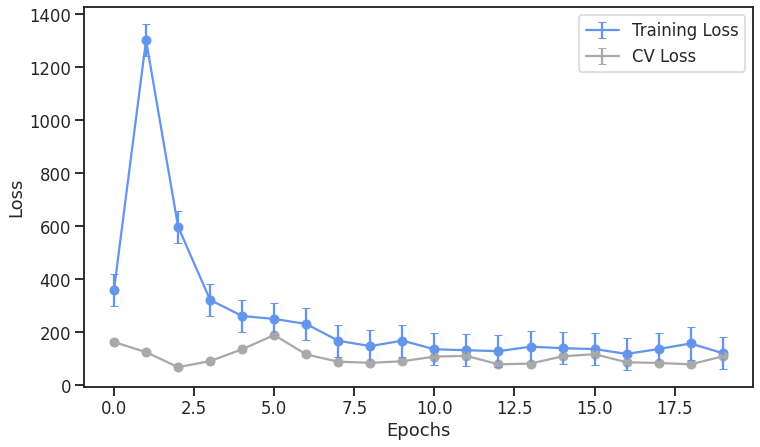

In [30]:
x_loss_errors_rnn=np.arange(len(default_rnn_history.history["loss"]))
y_loss_errors_rnn=default_rnn_history.history["loss"]
loss_std_errors_rnn=np.std(default_rnn_history.history["loss"], ddof=1) / np.sqrt(len(default_rnn_history.history["loss"]))
x_val_loss_errors_rnn=np.arange(len(default_rnn_history.history["val_loss"]))
y_val_loss_errors_rnn=default_rnn_history.history["val_loss"]
val_loss_std_errors_rnn=np.std(default_rnn_history.history["val_loss"], ddof=1) / np.sqrt(len(default_rnn_history.history["val_loss"]))
plt.plot(default_rnn_history.history["loss"], 'o', color="cornflowerblue")
plt.plot(default_rnn_history.history["val_loss"], 'o', color="darkgrey")
plt.errorbar(x_loss_errors_rnn, y_loss_errors_rnn, yerr=loss_std_errors_rnn, capsize=4, color="cornflowerblue", label="Training Loss")
plt.errorbar(x_val_loss_errors_rnn, y_val_loss_errors_rnn, yerr=val_loss_std_errors_rnn, capsize=4, color="darkgrey", label="CV Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

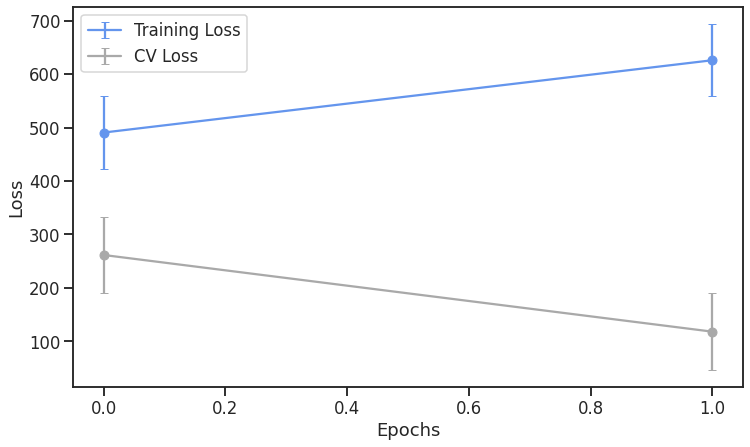

In [31]:
x_loss_errors_gru=np.arange(len(default_gru_history.history["loss"]))
y_loss_errors_gru=default_gru_history.history["loss"]
loss_std_errors_gru=np.std(default_gru_history.history["loss"], ddof=1) / np.sqrt(len(default_gru_history.history["loss"]))
x_val_loss_errors_gru=np.arange(len(default_gru_history.history["val_loss"]))
y_val_loss_errors_gru=default_gru_history.history["val_loss"]
val_loss_std_errors_gru=np.std(default_gru_history.history["val_loss"], ddof=1) / np.sqrt(len(default_gru_history.history["val_loss"]))
plt.plot(default_gru_history.history["loss"], 'o', color="cornflowerblue")
plt.plot(default_gru_history.history["val_loss"], 'o', color="darkgrey")
plt.errorbar(x_loss_errors_gru, y_loss_errors_gru, yerr=loss_std_errors_gru, capsize=4, color="cornflowerblue", label="Training Loss")
plt.errorbar(x_val_loss_errors_gru, y_val_loss_errors_gru, yerr=val_loss_std_errors_gru, capsize=4, color="darkgrey", label="CV Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

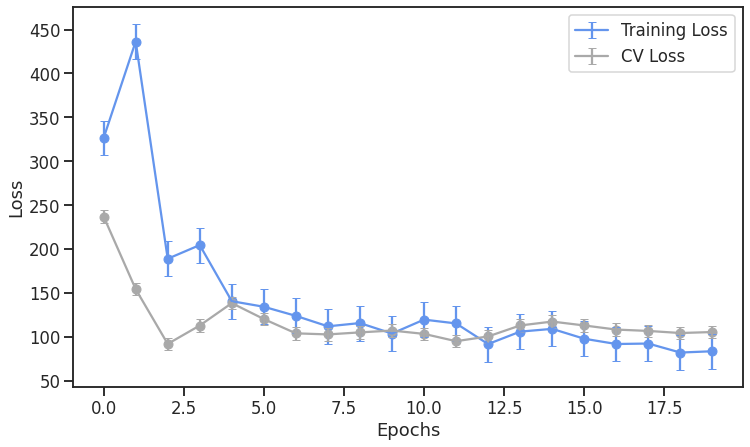

In [32]:
x_loss_errors_lstm=np.arange(len(default_lstm_history.history["loss"]))
y_loss_errors_lstm=default_lstm_history.history["loss"]
loss_std_errors_lstm=np.std(default_lstm_history.history["loss"], ddof=1) / np.sqrt(len(default_lstm_history.history["loss"]))
x_val_loss_errors_lstm=np.arange(len(default_lstm_history.history["val_loss"]))
y_val_loss_errors_lstm=default_lstm_history.history["val_loss"]
val_loss_std_errors_lstm=np.std(default_lstm_history.history["val_loss"], ddof=1) / np.sqrt(len(default_lstm_history.history["val_loss"]))
plt.plot(default_lstm_history.history["loss"], 'o', color="cornflowerblue")
plt.plot(default_lstm_history.history["val_loss"], 'o', color="darkgrey")
plt.errorbar(x_loss_errors_lstm, y_loss_errors_lstm, yerr=loss_std_errors_lstm, capsize=4, color="cornflowerblue", label="Training Loss")
plt.errorbar(x_val_loss_errors_lstm, y_val_loss_errors_lstm, yerr=val_loss_std_errors_lstm, capsize=4, color="darkgrey", label="CV Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

# The Performance of Models Trained on Important Economic Activities when Predicting the Reaction of Stock Market Returns to Changing Economic Activities in South Africa

Following the identification of important economic activities. The concurrent step was to compare the performance of models trained with important economic activities only against the performance of models trained with all changing economic activities. 

The table below shows the performance of models trained on important economic activities when predicting the reaction of stock market returns to changing economic activities in South Africa over four periods. 

In [33]:
x=reduced_feature_set_dt.iloc[::, 0: -1].columns # assign predictor features
y=pd.DataFrame(reduced_feature_set_dt.iloc[::, -1]).columns # assign the target feature
def models_experiment_w_dt_sel_feat(models, data, test_size_split_ratio, iterations=1):
    results={}
    for i in models:
        r_sqaured=[]
        mean_absolute_error=[]
        mean_squared_error=[]
        root_mean_squared_error=[]
        mean_absolute_percentage_error=[]
        for j in range(iterations):
            end=round(len(data)*test_size_split_ratio)
            x_train=data.iloc[::, 0: -1][:end]
            y_train=data.iloc[::, -1][:end]
            x_test=data.iloc[::, 0: -1][end:]
            y_test=data.iloc[::, -1][end:]
            x_train=scaler.fit_transform(x_train)
            x_test=scaler.transform(x_test)
            r_sqaured.append(metrics.r2_score(y_test, models[i].fit(x_train, y_train).predict(x_test)))
            mean_absolute_error.append(metrics.mean_absolute_error(y_test, models[i].fit(x_train, y_train).predict(x_test)))
            mean_squared_error.append(metrics.mean_squared_error(y_test, models[i].fit(x_train, y_train).predict(x_test)))
            root_mean_squared_error=np.sqrt(mean_squared_error)
            mean_absolute_percentage_error.append(metrics.mean_absolute_percentage_error(y_test, models[i].fit(x_train, y_train).predict(x_test)))
        results[i]=mean_absolute_error, mean_absolute_percentage_error,  mean_squared_error, root_mean_squared_error, r_sqaured
        results=pd.DataFrame(results, index=["MAE", "MAPE", "MSE", "RMSE", "R2"])
    return pd.DataFrame(results)
def models_experiment_w_dt_sel_feat_performance_appraisal_results(models_list, data):
    models_w_dt_sel_feat_h1_performance_appraisal=models_experiment_w_dt_sel_feat(models_list, data, 0.9875).transpose()
    models_w_dt_sel_feat_h1_performance_appraisal=pd.DataFrame(models_w_dt_sel_feat_h1_performance_appraisal["MAPE"])
    models_w_dt_sel_feat_h1_performance_appraisal.columns=["H1"]
    models_w_dt_sel_feat_h2_performance_appraisal=models_experiment_w_dt_sel_feat(models_list, data, 0.975).transpose()
    models_w_dt_sel_feat_h2_performance_appraisal=pd.DataFrame(models_w_dt_sel_feat_h2_performance_appraisal["MAPE"])
    models_w_dt_sel_feat_h2_performance_appraisal.columns=["H2"]
    models_w_dt_sel_feat_h3_performance_appraisal=models_experiment_w_dt_sel_feat(models_list, data, 0.95).transpose()
    models_w_dt_sel_feat_h3_performance_appraisal=pd.DataFrame(models_w_dt_sel_feat_h3_performance_appraisal["MAPE"])
    models_w_dt_sel_feat_h3_performance_appraisal.columns=["H3"]
    models_w_dt_sel_feat_h4_performance_appraisal=models_experiment_w_dt_sel_feat(models_list, data, 0.9).transpose()
    models_w_dt_sel_feat_h4_performance_appraisal=pd.DataFrame(models_w_dt_sel_feat_h4_performance_appraisal["MAPE"])
    models_w_dt_sel_feat_h4_performance_appraisal.columns=["H4"]
    models_w_dt_sel_feat_performance_appraisal=pd.concat([models_w_dt_sel_feat_h1_performance_appraisal, models_w_dt_sel_feat_h2_performance_appraisal, models_w_dt_sel_feat_h3_performance_appraisal, models_w_dt_sel_feat_h4_performance_appraisal,], axis=1)
    models_w_dt_sel_feat_performance_appraisal=remove_brackets_seperator(models_w_dt_sel_feat_performance_appraisal)
    models_w_dt_sel_feat_performance_appraisal=round(models_w_dt_sel_feat_performance_appraisal, 4)
    return models_w_dt_sel_feat_performance_appraisal
features_selected_using_dt_model_performance_appraisal_results=models_experiment_w_dt_sel_feat_performance_appraisal_results(all_models_list, reduced_feature_set_dt)
features_selected_using_dt_model_performance_appraisal_results=features_selected_using_dt_model_performance_appraisal_results.T
features_selected_using_dt_model_performance_appraisal_results=features_selected_using_dt_model_performance_appraisal_results.T
features_selected_using_dt_model_performance_appraisal_results.insert(loc=0, column="Feature Selection", value=["DT", "DT", "DT", "DT", "DT", "DT", "DT", "DT", "DT"])
for feature in list(reduced_feature_set_dt.columns.values):
    scaler=StandardScaler()
    scaler.fit(reduced_feature_set_dt[[feature]] )
    reduced_feature_set_dt[feature]=scaler.transform(reduced_feature_set_dt[[feature]])
def create_timestaped_data_matrix_multi(reduced_feature_set_dt, size):
    X_nn,y_nn,dates=[],[],[]
    for i in range(reduced_feature_set_dt.shape[0]-size):
        X_nn.append( np.asarray(reduced_feature_set_dt.values[i:i+size]).astype(np.float64) )
        y_nn.append( reduced_feature_set_dt.iloc[::,-1].values[i+size] )
        dates.append(reduced_feature_set_dt.index[i+size])
    return np.array(X_nn), np.array(y_nn), dates
window_size=50
X_nn,y_nn,dates=create_timestaped_data_matrix_multi(reduced_feature_set_dt, size=window_size)
def train_test_split_neural_network_ratios(split_ratio):
    test_size_ratio=split_ratio
    train_size=int((1-test_size_ratio)*len(y_nn))
    # Train Set
    y_train_nn=y_nn[:train_size]
    dates_train=dates[:train_size]
    y_test_nn=y_nn[train_size:]
    X_train_nn=X_nn[:train_size] 
    # Test Set
    dates_test=dates[train_size:]
    X_test_nn=X_nn[train_size:]
    y_train_nn_original=reduced_feature_set_dt.iloc[::,-1][window_size:train_size+window_size] # Storing original columns for plotting graph
    y_test_nn_original=reduced_feature_set_dt.iloc[::,-1][train_size+window_size:] # Storing original columns for plotting graph
    # Check length
    # len(y_train_nn)+len(y_test),len(y)
    return train_size, y_train_nn, dates_train,y_test_nn, X_train_nn ,dates_test, X_test_nn, y_train_nn_original, y_test_nn_original
train_size_h1, y_train_nn_h1, dates_train_h1, y_test_nn_h1, X_train_nn_h1, dates_test_h1, X_test_nn_h1, y_train_nn_original_h1, y_test_nn_original_h1=train_test_split_neural_network_ratios(0.0125)
train_size_h2, y_train_nn_h2, dates_train_h2, y_test_nn_h2, X_train_nn_h2, dates_test_h2, X_test_nn_h2, y_train_nn_original_h2, y_test_nn_original_h2=train_test_split_neural_network_ratios(0.025)
train_size_h3, y_train_nn_h3, dates_train_h3, y_test_nn_h3, X_train_nn_h3, dates_test_h3, X_test_nn_h3, y_train_nn_original_h3, y_test_nn_original_h3=train_test_split_neural_network_ratios(0.05)
train_size_h4, y_train_nn_h4, dates_train_h4, y_test_nn_h4, X_train_nn_h4, dates_test_h4, X_test_nn_h4, y_train_nn_original_h4, y_test_nn_original_h4=train_test_split_neural_network_ratios(0.1)
n_cols_1=X_train_nn_h1.shape[1]
n_cols_2=X_train_nn_h1.shape[2]
# Build the default RNN
# Build the default RNN
def rnn_w_dt_sel_feat_structure(optimizer="adam"):
    rnn_w_dt_sel_feat=Sequential()
    rnn_w_dt_sel_feat.add(SimpleRNN(500, return_sequences=True, input_shape=(n_cols_1, n_cols_2)))
    rnn_w_dt_sel_feat.add(SimpleRNN(100)) 
    rnn_w_dt_sel_feat.add(Dense(1))
    rnn_w_dt_sel_feat.compile( loss="mean_absolute_percentage_error", optimizer=optimizer)
    return rnn_w_dt_sel_feat
rnn_w_dt_sel_feat=KerasRegressor(build_fn=rnn_w_dt_sel_feat_structure)
rnn_w_dt_sel_feat_history=rnn_w_dt_sel_feat.fit(X_train_nn_h1, y_train_nn_h1, validation_data=(X_test_nn_h1, y_test_nn_h1), epochs=20, batch_size=128, verbose=1)
rnn_w_dt_sel_feat_h1_predictions=rnn_w_dt_sel_feat.predict(X_test_nn_h1)
rnn_w_dt_sel_feat_h1_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h1, rnn_w_dt_sel_feat_h1_predictions)), columns=["H1"])
rnn_w_dt_sel_feat_h1_appraisal_results.index=["RNN"]
rnn_w_dt_sel_feat_history=rnn_w_dt_sel_feat.fit(X_train_nn_h2, y_train_nn_h2, validation_data=(X_test_nn_h2, y_test_nn_h2), epochs=20, batch_size=128, verbose=1)
rnn_w_dt_sel_feat_h2_predictions=rnn_w_dt_sel_feat.predict(X_test_nn_h2)
rnn_w_dt_sel_feat_h2_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h2, rnn_w_dt_sel_feat_h2_predictions)), columns=["H2"])
rnn_w_dt_sel_feat_h2_appraisal_results.index=["RNN"]
rnn_w_dt_sel_feat_history=rnn_w_dt_sel_feat.fit(X_train_nn_h3, y_train_nn_h3, validation_data=(X_test_nn_h3 ,y_test_nn_h3), epochs=20, batch_size=128, verbose=1)
rnn_w_dt_sel_feat_h3_predictions=rnn_w_dt_sel_feat.predict(X_test_nn_h3)
rnn_w_dt_sel_feat_h3_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h3, rnn_w_dt_sel_feat_h3_predictions)), columns=["H3"])
rnn_w_dt_sel_feat_h3_appraisal_results.index=["RNN"]
rnn_w_dt_sel_feat_history=rnn_w_dt_sel_feat.fit(X_train_nn_h4, y_train_nn_h4, validation_data=(X_test_nn_h4 ,y_test_nn_h4), epochs=20, batch_size=128, verbose=1)
rnn_w_dt_sel_feat_h4_predictions=rnn_w_dt_sel_feat.predict(X_test_nn_h4)
rnn_w_dt_sel_feat_h4_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h4, rnn_w_dt_sel_feat_h4_predictions)), columns=["H4"])
rnn_w_dt_sel_feat_h4_appraisal_results.index=["RNN"]
rnn_w_dt_sel_feat_performance_appraisal_results_keras=pd.concat([rnn_w_dt_sel_feat_h1_appraisal_results, rnn_w_dt_sel_feat_h2_appraisal_results, rnn_w_dt_sel_feat_h3_appraisal_results, rnn_w_dt_sel_feat_h4_appraisal_results], axis=1)
# Build the default long-short term memory
def lstm_w_dt_sel_feat_structure(optimizer="adam"):
    lstm_w_dt_sel_feat=Sequential()
    lstm_w_dt_sel_feat.add(LSTM(500, return_sequences=True, input_shape=(n_cols_1, n_cols_2)))
    lstm_w_dt_sel_feat.add(LSTM(100)) 
    lstm_w_dt_sel_feat.add(Dense(1))
    lstm_w_dt_sel_feat.compile( loss="mean_absolute_percentage_error", optimizer=optimizer)
    return lstm_w_dt_sel_feat
lstm_w_dt_sel_feat=KerasRegressor(build_fn=lstm_w_dt_sel_feat_structure)
lstm_w_dt_sel_feat_history=lstm_w_dt_sel_feat.fit(X_train_nn_h1, y_train_nn_h1, validation_data=(X_test_nn_h1, y_test_nn_h1), epochs=20, batch_size=128, verbose=1)
lstm_w_dt_sel_feat_h1_predictions=lstm_w_dt_sel_feat.predict(X_test_nn_h1)
lstm_w_dt_sel_feat_h1_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h1, lstm_w_dt_sel_feat_h1_predictions)), columns=["H1"])
lstm_w_dt_sel_feat_h1_appraisal_results.index=["LSTM"]
lstm_w_dt_sel_feat_history=lstm_w_dt_sel_feat.fit(X_train_nn_h2, y_train_nn_h2, validation_data=(X_test_nn_h2, y_test_nn_h2), epochs=20, batch_size=128, verbose=1)
lstm_w_dt_sel_feat_h2_predictions=lstm_w_dt_sel_feat.predict(X_test_nn_h2)
lstm_w_dt_sel_feat_h2_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h2, lstm_w_dt_sel_feat_h2_predictions)), columns=["H2"])
lstm_w_dt_sel_feat_h2_appraisal_results.index=["LSTM"]
lstm_w_dt_sel_feat_history=lstm_w_dt_sel_feat.fit(X_train_nn_h3, y_train_nn_h3, validation_data=(X_test_nn_h3 ,y_test_nn_h3), epochs=20, batch_size=128, verbose=1)
lstm_w_dt_sel_feat_h3_predictions=lstm_w_dt_sel_feat.predict(X_test_nn_h3)
lstm_w_dt_sel_feat_h3_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h3, lstm_w_dt_sel_feat_h3_predictions)), columns=["H3"])
lstm_w_dt_sel_feat_h3_appraisal_results.index=["LSTM"]
lstm_w_dt_sel_feat_history=lstm_w_dt_sel_feat.fit(X_train_nn_h4, y_train_nn_h4, validation_data=(X_test_nn_h4 ,y_test_nn_h4), epochs=20, batch_size=128, verbose=1)
lstm_w_dt_sel_feat_h4_predictions=lstm_w_dt_sel_feat.predict(X_test_nn_h4)
lstm_w_dt_sel_feat_h4_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h4, lstm_w_dt_sel_feat_h4_predictions)), columns=["H4"])
lstm_w_dt_sel_feat_h4_appraisal_results.index=["LSTM"]
lstm_w_dt_sel_feat_performance_appraisal_results_keras=pd.concat([lstm_w_dt_sel_feat_h1_appraisal_results, lstm_w_dt_sel_feat_h2_appraisal_results, lstm_w_dt_sel_feat_h3_appraisal_results, lstm_w_dt_sel_feat_h4_appraisal_results], axis=1)
# Build the default gated recurrent unit structure
def gru_w_dt_sel_feat_structure(optimizer="adam"):
    gru_w_dt_sel_feat=Sequential()
    gru_w_dt_sel_feat.add(GRU(500, return_sequences=True, input_shape=(n_cols_1, n_cols_2) ) )
    gru_w_dt_sel_feat.add(GRU(100)) 
    gru_w_dt_sel_feat.add(Dense(1))
    gru_w_dt_sel_feat.compile(loss="mean_absolute_percentage_error", optimizer=optimizer)
    return gru_w_dt_sel_feat
gru_w_dt_sel_feat=KerasRegressor(build_fn=gru_w_dt_sel_feat_structure)
gru_w_dt_sel_feat_history=gru_w_dt_sel_feat.fit(X_train_nn_h1, y_train_nn_h1, validation_data=(X_test_nn_h1, y_test_nn_h1), epochs=20, batch_size=128, verbose=1)
gru_w_dt_sel_feat_h1_predictions=gru_w_dt_sel_feat.predict(X_test_nn_h1)
gru_w_dt_sel_feat_h1_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h1, gru_w_dt_sel_feat_h1_predictions)), columns=["H1"])
gru_w_dt_sel_feat_h1_appraisal_results.index=["GRU"]
gru_w_dt_sel_feat_history=gru_w_dt_sel_feat.fit(X_train_nn_h2, y_train_nn_h2, validation_data=(X_test_nn_h2, y_test_nn_h2), epochs=20, batch_size=128, verbose=1)
gru_w_dt_sel_feat_h2_predictions=gru_w_dt_sel_feat.predict(X_test_nn_h2)
gru_w_dt_sel_feat_h2_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h2, gru_w_dt_sel_feat_h2_predictions)), columns=["H2"])
gru_w_dt_sel_feat_h2_appraisal_results.index=["GRU"]
gru_w_dt_sel_feat_history=gru_w_dt_sel_feat.fit(X_train_nn_h3, y_train_nn_h3, validation_data=(X_test_nn_h3 ,y_test_nn_h3), epochs=20, batch_size=128, verbose=1)
gru_w_dt_sel_feat_h3_predictions=gru_w_dt_sel_feat.predict(X_test_nn_h3)
gru_w_dt_sel_feat_h3_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h3, gru_w_dt_sel_feat_h3_predictions)), columns=["H3"])
gru_w_dt_sel_feat_h3_appraisal_results.index=["GRU"]
gru_w_dt_sel_feat_history=gru_w_dt_sel_feat.fit(X_train_nn_h4, y_train_nn_h4, validation_data=(X_test_nn_h4 ,y_test_nn_h4), epochs=20, batch_size=128, verbose=1)
gru_w_dt_sel_feat_h4_predictions=gru_w_dt_sel_feat.predict(X_test_nn_h4)
gru_w_dt_sel_feat_h4_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h4, gru_w_dt_sel_feat_h4_predictions)), columns=["H4"])
gru_w_dt_sel_feat_h4_appraisal_results.index=["GRU"]
gru_w_dt_sel_feat_performance_appraisal_results_keras=pd.concat([gru_w_dt_sel_feat_h1_appraisal_results, gru_w_dt_sel_feat_h2_appraisal_results, gru_w_dt_sel_feat_h3_appraisal_results, gru_w_dt_sel_feat_h4_appraisal_results], axis=1)
w_dt_performance_appraisal_results_keras=pd.concat([rnn_w_dt_sel_feat_performance_appraisal_results_keras, lstm_w_dt_sel_feat_performance_appraisal_results_keras, gru_w_dt_sel_feat_performance_appraisal_results_keras])
w_dt_performance_appraisal_results_keras.insert(loc=0, column="Feature Selection",
                                                value=["DT", "DT", "DT"])
all_models_w_dt_sel_feat_performance_appraisal_results=pd.concat([features_selected_using_dt_model_performance_appraisal_results, w_dt_performance_appraisal_results_keras])

# Feature Selection w RFT
x=reduced_feature_set_rft.iloc[::, 0: -1].columns # Assign predictor features
y=pd.DataFrame(reduced_feature_set_rft.iloc[::, -1]).columns # Assign the target feature
def models_experiment_w_rft_sel_feat(models, data, test_size_split_ratio, iterations=1):
    results={}
    for i in models:
        r_sqaured=[]
        mean_absolute_error=[]
        mean_squared_error=[]
        root_mean_squared_error=[]
        mean_absolute_percentage_error=[]
        for j in range(iterations):
            x_train, x_test, y_train, y_test=train_test_split(data[x],  data[y], test_size=test_size_split_ratio)
            x_train=scaler.fit_transform(x_train)
            x_test=scaler.transform(x_test)
            r_sqaured.append(metrics.r2_score(y_test, models[i].fit(x_train, y_train).predict(x_test)))
            mean_absolute_error.append(metrics.mean_absolute_error(y_test, models[i].fit(x_train, y_train).predict(x_test)))
            mean_squared_error.append(metrics.mean_squared_error(y_test, models[i].fit(x_train, y_train).predict(x_test)))
            root_mean_squared_error=np.sqrt(mean_squared_error)
            mean_absolute_percentage_error.append(metrics.mean_absolute_percentage_error(y_test, models[i].fit(x_train, y_train).predict(x_test)))
        results[i]=mean_absolute_error, mean_absolute_percentage_error,  mean_squared_error, root_mean_squared_error, r_sqaured
        results=pd.DataFrame(results, index=["MAE", "MAPE", "MSE", "RMSE", "R2"])
    return pd.DataFrame(results)
def models_experiment_w_rft_sel_feat_performance_appraisal_results(models_list, data):
    models_w_rft_sel_feat_h1_performance_appraisal=models_experiment_w_rft_sel_feat(models_list, data, 0.9875).transpose()
    models_w_rft_sel_feat_h1_performance_appraisal=pd.DataFrame(models_w_rft_sel_feat_h1_performance_appraisal["MAPE"])
    models_w_rft_sel_feat_h1_performance_appraisal.columns=["H1"]
    models_w_rft_sel_feat_h2_performance_appraisal=models_experiment_w_rft_sel_feat(models_list, data, 0.975).transpose()
    models_w_rft_sel_feat_h2_performance_appraisal=pd.DataFrame(models_w_rft_sel_feat_h2_performance_appraisal["MAPE"])
    models_w_rft_sel_feat_h2_performance_appraisal.columns=["H2"]
    models_w_rft_sel_feat_h3_performance_appraisal=models_experiment_w_rft_sel_feat(models_list, data, 0.95).transpose()
    models_w_rft_sel_feat_h3_performance_appraisal=pd.DataFrame(models_w_rft_sel_feat_h3_performance_appraisal["MAPE"])
    models_w_rft_sel_feat_h3_performance_appraisal.columns=["H3"]
    models_w_rft_sel_feat_h4_performance_appraisal=models_experiment_w_rft_sel_feat(models_list, data, 0.9).transpose()
    models_w_rft_sel_feat_h4_performance_appraisal=pd.DataFrame(models_w_rft_sel_feat_h4_performance_appraisal["MAPE"])
    models_w_rft_sel_feat_h4_performance_appraisal.columns=["H4"]
    models_w_rft_sel_feat_performance_appraisal=pd.concat([models_w_rft_sel_feat_h1_performance_appraisal, models_w_rft_sel_feat_h2_performance_appraisal, models_w_rft_sel_feat_h3_performance_appraisal, models_w_rft_sel_feat_h4_performance_appraisal,], axis=1)
    models_w_rft_sel_feat_performance_appraisal=remove_brackets_seperator(models_w_rft_sel_feat_performance_appraisal)
    models_w_rft_sel_feat_performance_appraisal=round(models_w_rft_sel_feat_performance_appraisal, 4)
    return models_w_rft_sel_feat_performance_appraisal
features_selected_using_rft_model_performance_appraisal_results=models_experiment_w_rft_sel_feat_performance_appraisal_results(all_models_list, reduced_feature_set_rft)
features_selected_using_rft_model_performance_appraisal_results=features_selected_using_rft_model_performance_appraisal_results.T
features_selected_using_rft_model_performance_appraisal_results=features_selected_using_rft_model_performance_appraisal_results.T
features_selected_using_rft_model_performance_appraisal_results.insert(loc=0, column="Feature Selection",
                                                                       value=["RFT", "RFT", "RFT", "RFT", "RFT", "RFT", "RFT", "RFT", "RFT"])
for feature in list(reduced_feature_set_rft.columns.values):
    scaler=StandardScaler()
    scaler.fit(reduced_feature_set_rft[[feature]] )
    reduced_feature_set_rft[feature]=scaler.transform(reduced_feature_set_rft[[feature]])
def create_timestaped_data_matrix_multi(reduced_feature_set_rft, size):
    X_nn,y_nn,dates=[],[],[]
    for i in range(reduced_feature_set_rft.shape[0]-size):
        X_nn.append( np.asarray(reduced_feature_set_rft.values[i:i+size]).astype(np.float64) )
        y_nn.append( reduced_feature_set_rft.iloc[::,-1].values[i+size] )
        dates.append(reduced_feature_set_rft.index[i+size])
    return np.array(X_nn), np.array(y_nn), dates
window_size=50
X_nn,y_nn,dates=create_timestaped_data_matrix_multi(reduced_feature_set_rft, size=window_size)
def train_test_split_neural_network_ratios(split_ratio):
    test_size_ratio=split_ratio
    train_size=int((1-test_size_ratio)*len(y_nn))
    # Train Set
    y_train_nn=y_nn[:train_size]
    dates_train=dates[:train_size]
    y_test_nn=y_nn[train_size:]
    X_train_nn=X_nn[:train_size] 
    # Test Set
    dates_test=dates[train_size:]
    X_test_nn=X_nn[train_size:]
    y_train_nn_original=reduced_feature_set_rft.iloc[::,-1][window_size:train_size+window_size] # Storing original columns for plotting graph
    y_test_nn_original=reduced_feature_set_rft.iloc[::,-1][train_size+window_size:] # Storing original columns for plotting graph
    # Check length
    # len(y_train_nn)+len(y_test),len(y)
    return train_size, y_train_nn, dates_train,y_test_nn, X_train_nn ,dates_test, X_test_nn, y_train_nn_original, y_test_nn_original
train_size_h1, y_train_nn_h1, dates_train_h1, y_test_nn_h1, X_train_nn_h1, dates_test_h1, X_test_nn_h1, y_train_nn_original_h1, y_test_nn_original_h1=train_test_split_neural_network_ratios(0.0125)
train_size_h2, y_train_nn_h2, dates_train_h2, y_test_nn_h2, X_train_nn_h2, dates_test_h2, X_test_nn_h2, y_train_nn_original_h2, y_test_nn_original_h2=train_test_split_neural_network_ratios(0.025)
train_size_h3, y_train_nn_h3, dates_train_h3, y_test_nn_h3, X_train_nn_h3, dates_test_h3, X_test_nn_h3, y_train_nn_original_h3, y_test_nn_original_h3=train_test_split_neural_network_ratios(0.05)
train_size_h4, y_train_nn_h4, dates_train_h4, y_test_nn_h4, X_train_nn_h4, dates_test_h4, X_test_nn_h4, y_train_nn_original_h4, y_test_nn_original_h4=train_test_split_neural_network_ratios(0.1)
n_cols_1=X_train_nn_h1.shape[1]
n_cols_2=X_train_nn_h1.shape[2]
# Build the default RNN
# Build the default RNN
def rnn_w_rft_sel_feat_structure(optimizer="adam"):
    rnn_w_rft_sel_feat=Sequential()
    rnn_w_rft_sel_feat.add(SimpleRNN(500, return_sequences=True, input_shape=(n_cols_1, n_cols_2)))
    rnn_w_rft_sel_feat.add(SimpleRNN(100)) 
    rnn_w_rft_sel_feat.add(Dense(1))
    rnn_w_rft_sel_feat.compile( loss="mean_absolute_percentage_error", optimizer=optimizer)
    return rnn_w_rft_sel_feat
rnn_w_rft_sel_feat=KerasRegressor(build_fn=rnn_w_rft_sel_feat_structure)
rnn_w_rft_sel_feat_history=rnn_w_rft_sel_feat.fit(X_train_nn_h1, y_train_nn_h1, validation_data=(X_test_nn_h1, y_test_nn_h1), epochs=20, batch_size=128, verbose=1)
rnn_w_rft_sel_feat_h1_predictions=rnn_w_rft_sel_feat.predict(X_test_nn_h1)
rnn_w_rft_sel_feat_h1_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h1, rnn_w_rft_sel_feat_h1_predictions)), columns=["H1"])
rnn_w_rft_sel_feat_h1_appraisal_results.index=["RNN"]
rnn_w_rft_sel_feat_history=rnn_w_rft_sel_feat.fit(X_train_nn_h2, y_train_nn_h2, validation_data=(X_test_nn_h2, y_test_nn_h2), epochs=20, batch_size=128, verbose=1)
rnn_w_rft_sel_feat_h2_predictions=rnn_w_rft_sel_feat.predict(X_test_nn_h2)
rnn_w_rft_sel_feat_h2_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h2, rnn_w_rft_sel_feat_h2_predictions)), columns=["H2"])
rnn_w_rft_sel_feat_h2_appraisal_results.index=["RNN"]
rnn_w_rft_sel_feat_history=rnn_w_rft_sel_feat.fit(X_train_nn_h3, y_train_nn_h3, validation_data=(X_test_nn_h3 ,y_test_nn_h3), epochs=20, batch_size=128, verbose=1)
rnn_w_rft_sel_feat_h3_predictions=rnn_w_rft_sel_feat.predict(X_test_nn_h3)
rnn_w_rft_sel_feat_h3_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h3, rnn_w_rft_sel_feat_h3_predictions)), columns=["H3"])
rnn_w_rft_sel_feat_h3_appraisal_results.index=["RNN"]
rnn_w_rft_sel_feat_history=rnn_w_rft_sel_feat.fit(X_train_nn_h4, y_train_nn_h4, validation_data=(X_test_nn_h4 ,y_test_nn_h4), epochs=20, batch_size=128, verbose=1)
rnn_w_rft_sel_feat_h4_predictions=rnn_w_rft_sel_feat.predict(X_test_nn_h4)
rnn_w_rft_sel_feat_h4_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h4, rnn_w_rft_sel_feat_h4_predictions)), columns=["H4"])
rnn_w_rft_sel_feat_h4_appraisal_results.index=["RNN"]
rnn_w_rft_sel_feat_performance_appraisal_results_keras=pd.concat([rnn_w_rft_sel_feat_h1_appraisal_results, rnn_w_rft_sel_feat_h2_appraisal_results, rnn_w_rft_sel_feat_h3_appraisal_results, rnn_w_rft_sel_feat_h4_appraisal_results], axis=1)
# Build the default long-short term memory
def lstm_w_rft_sel_feat_structure(optimizer="adam"):
    lstm_w_rft_sel_feat=Sequential()
    lstm_w_rft_sel_feat.add(LSTM(500, return_sequences=True, input_shape=(n_cols_1, n_cols_2)))
    lstm_w_rft_sel_feat.add(LSTM(100)) 
    lstm_w_rft_sel_feat.add(Dense(1))
    lstm_w_rft_sel_feat.compile( loss="mean_absolute_percentage_error", optimizer=optimizer)
    return lstm_w_rft_sel_feat
lstm_w_rft_sel_feat=KerasRegressor(build_fn=lstm_w_rft_sel_feat_structure)
lstm_w_rft_sel_feat_history=lstm_w_rft_sel_feat.fit(X_train_nn_h1, y_train_nn_h1, validation_data=(X_test_nn_h1, y_test_nn_h1), epochs=20, batch_size=128, verbose=1)
lstm_w_rft_sel_feat_h1_predictions=lstm_w_rft_sel_feat.predict(X_test_nn_h1)
lstm_w_rft_sel_feat_h1_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h1, lstm_w_rft_sel_feat_h1_predictions)), columns=["H1"])
lstm_w_rft_sel_feat_h1_appraisal_results.index=["LSTM"]
lstm_w_rft_sel_feat_history=lstm_w_rft_sel_feat.fit(X_train_nn_h2, y_train_nn_h2, validation_data=(X_test_nn_h2, y_test_nn_h2), epochs=20, batch_size=128, verbose=1)
lstm_w_rft_sel_feat_h2_predictions=lstm_w_rft_sel_feat.predict(X_test_nn_h2)
lstm_w_rft_sel_feat_h2_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h2, lstm_w_rft_sel_feat_h2_predictions)), columns=["H2"])
lstm_w_rft_sel_feat_h2_appraisal_results.index=["LSTM"]
lstm_w_rft_sel_feat_history=lstm_w_rft_sel_feat.fit(X_train_nn_h3, y_train_nn_h3, validation_data=(X_test_nn_h3 ,y_test_nn_h3), epochs=20, batch_size=128, verbose=1)
lstm_w_rft_sel_feat_h3_predictions=lstm_w_rft_sel_feat.predict(X_test_nn_h3)
lstm_w_rft_sel_feat_h3_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h3, lstm_w_rft_sel_feat_h3_predictions)), columns=["H3"])
lstm_w_rft_sel_feat_h3_appraisal_results.index=["LSTM"]
lstm_w_rft_sel_feat_history=lstm_w_rft_sel_feat.fit(X_train_nn_h4, y_train_nn_h4, validation_data=(X_test_nn_h4 ,y_test_nn_h4), epochs=20, batch_size=128, verbose=1)
lstm_w_rft_sel_feat_h4_predictions=lstm_w_rft_sel_feat.predict(X_test_nn_h4)
lstm_w_rft_sel_feat_h4_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h4, lstm_w_rft_sel_feat_h4_predictions)), columns=["H4"])
lstm_w_rft_sel_feat_h4_appraisal_results.index=["LSTM"]
lstm_w_rft_sel_feat_performance_appraisal_results_keras=pd.concat([lstm_w_rft_sel_feat_h1_appraisal_results, lstm_w_rft_sel_feat_h2_appraisal_results, lstm_w_rft_sel_feat_h3_appraisal_results, lstm_w_rft_sel_feat_h4_appraisal_results], axis=1)
# Build the default gated recurrent unit structure
def gru_w_rft_sel_feat_structure(optimizer="adam"):
    gru_w_rft_sel_feat=Sequential()
    gru_w_rft_sel_feat.add(GRU(500, return_sequences=True, input_shape=(n_cols_1, n_cols_2) ) )
    gru_w_rft_sel_feat.add(GRU(100)) 
    gru_w_rft_sel_feat.add(Dense(1))
    gru_w_rft_sel_feat.compile(loss="mean_absolute_percentage_error", optimizer=optimizer)
    return gru_w_rft_sel_feat
gru_w_rft_sel_feat=KerasRegressor(build_fn=gru_w_rft_sel_feat_structure)
gru_w_rft_sel_feat_history=gru_w_rft_sel_feat.fit(X_train_nn_h1, y_train_nn_h1, validation_data=(X_test_nn_h1, y_test_nn_h1), epochs=20, batch_size=128, verbose=1)
gru_w_rft_sel_feat_h1_predictions=gru_w_rft_sel_feat.predict(X_test_nn_h1)
gru_w_rft_sel_feat_h1_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h1, gru_w_rft_sel_feat_h1_predictions)), columns=["H1"])
gru_w_rft_sel_feat_h1_appraisal_results.index=["GRU"]
gru_w_rft_sel_feat_history=gru_w_rft_sel_feat.fit(X_train_nn_h2, y_train_nn_h2, validation_data=(X_test_nn_h2, y_test_nn_h2), epochs=20, batch_size=128, verbose=1)
gru_w_rft_sel_feat_h2_predictions=gru_w_rft_sel_feat.predict(X_test_nn_h2)
gru_w_rft_sel_feat_h2_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h2, gru_w_rft_sel_feat_h2_predictions)), columns=["H2"])
gru_w_rft_sel_feat_h2_appraisal_results.index=["GRU"]
gru_w_rft_sel_feat_history=gru_w_rft_sel_feat.fit(X_train_nn_h3, y_train_nn_h3, validation_data=(X_test_nn_h3 ,y_test_nn_h3), epochs=20, batch_size=128, verbose=1)
gru_w_rft_sel_feat_h3_predictions=gru_w_rft_sel_feat.predict(X_test_nn_h3)
gru_w_rft_sel_feat_h3_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h3, gru_w_rft_sel_feat_h3_predictions)), columns=["H3"])
gru_w_rft_sel_feat_h3_appraisal_results.index=["GRU"]
gru_w_rft_sel_feat_history=gru_w_rft_sel_feat.fit(X_train_nn_h4, y_train_nn_h4, validation_data=(X_test_nn_h4 ,y_test_nn_h4), epochs=20, batch_size=128, verbose=1)
gru_w_rft_sel_feat_h4_predictions=gru_w_rft_sel_feat.predict(X_test_nn_h4)
gru_w_rft_sel_feat_h4_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h4, gru_w_rft_sel_feat_h4_predictions)), columns=["H4"])
gru_w_rft_sel_feat_h4_appraisal_results.index=["GRU"]
gru_w_rft_sel_feat_performance_appraisal_results_keras=pd.concat([gru_w_rft_sel_feat_h1_appraisal_results, gru_w_rft_sel_feat_h2_appraisal_results, gru_w_rft_sel_feat_h3_appraisal_results, gru_w_rft_sel_feat_h4_appraisal_results], axis=1)

w_rft_performance_appraisal_results_keras=pd.concat([rnn_w_rft_sel_feat_performance_appraisal_results_keras, lstm_w_rft_sel_feat_performance_appraisal_results_keras, gru_w_rft_sel_feat_performance_appraisal_results_keras])
w_rft_performance_appraisal_results_keras.insert(loc=0, column="Feature Selection", value=["RFT", "RFT", "RFT"])
all_models_w_rft_sel_feat_performance_appraisal_results=pd.concat([features_selected_using_rft_model_performance_appraisal_results, w_rft_performance_appraisal_results_keras])
# Feature Selection w XGBT
x=reduced_feature_set_xgbt.iloc[::, 0: -1].columns # Assign predictor features
y=pd.DataFrame(reduced_feature_set_xgbt.iloc[::, -1]).columns # Assign the target feature
def models_experiment_w_xgbt_sel_feat(models, data, test_size_split_ratio, iterations=1):
    results={}
    for i in models:
        r_sqaured=[]
        mean_absolute_error=[]
        mean_squared_error=[]
        root_mean_squared_error=[]
        mean_absolute_percentage_error=[]
        for j in range(iterations):
            x_train, x_test, y_train, y_test=train_test_split(data[x],  data[y], test_size=test_size_split_ratio)
            x_train=scaler.fit_transform(x_train)
            x_test=scaler.transform(x_test)
            r_sqaured.append(metrics.r2_score(y_test, models[i].fit(x_train, y_train).predict(x_test)))
            mean_absolute_error.append(metrics.mean_absolute_error(y_test, models[i].fit(x_train, y_train).predict(x_test)))
            mean_squared_error.append(metrics.mean_squared_error(y_test, models[i].fit(x_train, y_train).predict(x_test)))
            root_mean_squared_error=np.sqrt(mean_squared_error)
            mean_absolute_percentage_error.append(metrics.mean_absolute_percentage_error(y_test, models[i].fit(x_train, y_train).predict(x_test)))
        results[i]=mean_absolute_error, mean_absolute_percentage_error,  mean_squared_error, root_mean_squared_error, r_sqaured
        results=pd.DataFrame(results, index=["MAE", "MAPE", "MSE", "RMSE", "R2"])
    return pd.DataFrame(results)
def models_experiment_w_xgbt_sel_feat_performance_appraisal_results(models_list, data):
    models_w_xgbt_sel_feat_h1_performance_appraisal=models_experiment_w_xgbt_sel_feat(models_list, data, 0.9875).transpose()
    models_w_xgbt_sel_feat_h1_performance_appraisal=pd.DataFrame(models_w_xgbt_sel_feat_h1_performance_appraisal["MAPE"])
    models_w_xgbt_sel_feat_h1_performance_appraisal.columns=["H1"]
    models_w_xgbt_sel_feat_h2_performance_appraisal=models_experiment_w_xgbt_sel_feat(models_list, data, 0.975).transpose()
    models_w_xgbt_sel_feat_h2_performance_appraisal=pd.DataFrame(models_w_xgbt_sel_feat_h2_performance_appraisal["MAPE"])
    models_w_xgbt_sel_feat_h2_performance_appraisal.columns=["H2"]
    models_w_xgbt_sel_feat_h3_performance_appraisal=models_experiment_w_xgbt_sel_feat(models_list, data, 0.95).transpose()
    models_w_xgbt_sel_feat_h3_performance_appraisal=pd.DataFrame(models_w_xgbt_sel_feat_h3_performance_appraisal["MAPE"])
    models_w_xgbt_sel_feat_h3_performance_appraisal.columns=["H3"]
    models_w_xgbt_sel_feat_h4_performance_appraisal=models_experiment_w_xgbt_sel_feat(models_list, data, 0.9).transpose()
    models_w_xgbt_sel_feat_h4_performance_appraisal=pd.DataFrame(models_w_xgbt_sel_feat_h4_performance_appraisal["MAPE"])
    models_w_xgbt_sel_feat_h4_performance_appraisal.columns=["H4"]
    models_w_xgbt_sel_feat_performance_appraisal=pd.concat([models_w_xgbt_sel_feat_h1_performance_appraisal, models_w_xgbt_sel_feat_h2_performance_appraisal, models_w_xgbt_sel_feat_h3_performance_appraisal, models_w_xgbt_sel_feat_h4_performance_appraisal,], axis=1)
    models_w_xgbt_sel_feat_performance_appraisal=remove_brackets_seperator(models_w_xgbt_sel_feat_performance_appraisal)
    models_w_xgbt_sel_feat_performance_appraisal=round(models_w_xgbt_sel_feat_performance_appraisal, 4)
    return models_w_xgbt_sel_feat_performance_appraisal
features_selected_using_xgbt_model_performance_appraisal_results=models_experiment_w_xgbt_sel_feat_performance_appraisal_results(all_models_list, reduced_feature_set_xgbt)
features_selected_using_xgbt_model_performance_appraisal_results=features_selected_using_xgbt_model_performance_appraisal_results.T
features_selected_using_xgbt_model_performance_appraisal_results=features_selected_using_xgbt_model_performance_appraisal_results.T
features_selected_using_xgbt_model_performance_appraisal_results.insert(loc=0, column="Feature Selection", value=["XGBT", "XGBT", "XGBT", "XGBT", "XGBT", "XGBT", "XGBT", "XGBT", "XGBT"])
for feature in list(reduced_feature_set_xgbt.columns.values):
    scaler=StandardScaler()
    scaler.fit(reduced_feature_set_xgbt[[feature]] )
    reduced_feature_set_xgbt[feature]=scaler.transform(reduced_feature_set_xgbt[[feature]])
def create_timestaped_data_matrix_multi(reduced_feature_set_xgbt, size):
    X_nn,y_nn,dates=[],[],[]
    for i in range(reduced_feature_set_xgbt.shape[0]-size):
        X_nn.append( np.asarray(reduced_feature_set_xgbt.values[i:i+size]).astype(np.float64) )
        y_nn.append( reduced_feature_set_xgbt.iloc[::,-1].values[i+size] )
        dates.append(reduced_feature_set_xgbt.index[i+size])
    return np.array(X_nn), np.array(y_nn), dates
window_size=50
X_nn,y_nn,dates=create_timestaped_data_matrix_multi(reduced_feature_set_xgbt, size=window_size)
def train_test_split_neural_network_ratios(split_ratio):
    test_size_ratio=split_ratio
    train_size=int((1-test_size_ratio)*len(y_nn))
    # Train Set
    y_train_nn=y_nn[:train_size]
    dates_train=dates[:train_size]
    y_test_nn=y_nn[train_size:]
    X_train_nn=X_nn[:train_size] 
    # Test Set
    dates_test=dates[train_size:]
    X_test_nn=X_nn[train_size:]
    y_train_nn_original=reduced_feature_set_xgbt.iloc[::,-1][window_size:train_size+window_size] # Storing original columns for plotting graph
    y_test_nn_original=reduced_feature_set_xgbt.iloc[::,-1][train_size+window_size:] # Storing original columns for plotting graph
    # Check length
    # len(y_train_nn)+len(y_test),len(y)
    return train_size, y_train_nn, dates_train,y_test_nn, X_train_nn ,dates_test, X_test_nn, y_train_nn_original, y_test_nn_original
train_size_h1, y_train_nn_h1, dates_train_h1, y_test_nn_h1, X_train_nn_h1, dates_test_h1, X_test_nn_h1, y_train_nn_original_h1, y_test_nn_original_h1=train_test_split_neural_network_ratios(0.0125)
train_size_h2, y_train_nn_h2, dates_train_h2, y_test_nn_h2, X_train_nn_h2, dates_test_h2, X_test_nn_h2, y_train_nn_original_h2, y_test_nn_original_h2=train_test_split_neural_network_ratios(0.025)
train_size_h3, y_train_nn_h3, dates_train_h3, y_test_nn_h3, X_train_nn_h3, dates_test_h3, X_test_nn_h3, y_train_nn_original_h3, y_test_nn_original_h3=train_test_split_neural_network_ratios(0.05)
train_size_h4, y_train_nn_h4, dates_train_h4, y_test_nn_h4, X_train_nn_h4, dates_test_h4, X_test_nn_h4, y_train_nn_original_h4, y_test_nn_original_h4=train_test_split_neural_network_ratios(0.1)
n_cols_1=X_train_nn_h1.shape[1]
n_cols_2=X_train_nn_h1.shape[2]
# Build the default RNN
def rnn_w_xgbt_sel_feat_structure(optimizer="adam"):
    rnn_w_xgbt_sel_feat=Sequential()
    rnn_w_xgbt_sel_feat.add(SimpleRNN(500, return_sequences=True, input_shape=(n_cols_1, n_cols_2)))
    rnn_w_xgbt_sel_feat.add(SimpleRNN(100)) 
    rnn_w_xgbt_sel_feat.add(Dense(1))
    rnn_w_xgbt_sel_feat.compile( loss="mean_absolute_percentage_error", optimizer=optimizer)
    return rnn_w_xgbt_sel_feat
rnn_w_xgbt_sel_feat=KerasRegressor(build_fn=rnn_w_xgbt_sel_feat_structure)
rnn_w_xgbt_sel_feat_history=rnn_w_xgbt_sel_feat.fit(X_train_nn_h1, y_train_nn_h1, validation_data=(X_test_nn_h1, y_test_nn_h1), epochs=20, batch_size=128, verbose=1)
rnn_w_xgbt_sel_feat_h1_predictions=rnn_w_xgbt_sel_feat.predict(X_test_nn_h1)
rnn_w_xgbt_sel_feat_h1_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h1, rnn_w_xgbt_sel_feat_h1_predictions)), columns=["H1"])
rnn_w_xgbt_sel_feat_h1_appraisal_results.index=["RNN"]
rnn_w_xgbt_sel_feat_history=rnn_w_xgbt_sel_feat.fit(X_train_nn_h2, y_train_nn_h2, validation_data=(X_test_nn_h2, y_test_nn_h2), epochs=20, batch_size=128, verbose=1)
rnn_w_xgbt_sel_feat_h2_predictions=rnn_w_xgbt_sel_feat.predict(X_test_nn_h2)
rnn_w_xgbt_sel_feat_h2_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h2, rnn_w_xgbt_sel_feat_h2_predictions)), columns=["H2"])
rnn_w_xgbt_sel_feat_h2_appraisal_results.index=["RNN"]
rnn_w_xgbt_sel_feat_history=rnn_w_xgbt_sel_feat.fit(X_train_nn_h3, y_train_nn_h3, validation_data=(X_test_nn_h3 ,y_test_nn_h3), epochs=20, batch_size=128, verbose=1)
rnn_w_xgbt_sel_feat_h3_predictions=rnn_w_xgbt_sel_feat.predict(X_test_nn_h3)
rnn_w_xgbt_sel_feat_h3_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h3, rnn_w_xgbt_sel_feat_h3_predictions)), columns=["H3"])
rnn_w_xgbt_sel_feat_h3_appraisal_results.index=["RNN"]
rnn_w_xgbt_sel_feat_history=rnn_w_xgbt_sel_feat.fit(X_train_nn_h4, y_train_nn_h4, validation_data=(X_test_nn_h4 ,y_test_nn_h4), epochs=20, batch_size=128, verbose=1)
rnn_w_xgbt_sel_feat_h4_predictions=rnn_w_xgbt_sel_feat.predict(X_test_nn_h4)
rnn_w_xgbt_sel_feat_h4_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h4, rnn_w_xgbt_sel_feat_h4_predictions)), columns=["H4"])
rnn_w_xgbt_sel_feat_h4_appraisal_results.index=["RNN"]
rnn_w_xgbt_sel_feat_performance_appraisal_results_keras=pd.concat([rnn_w_xgbt_sel_feat_h1_appraisal_results, rnn_w_xgbt_sel_feat_h2_appraisal_results, rnn_w_xgbt_sel_feat_h3_appraisal_results, rnn_w_xgbt_sel_feat_h4_appraisal_results], axis=1)
# Build the default long-short term memory
def lstm_w_xgbt_sel_feat_structure(optimizer="adam"):
    lstm_w_xgbt_sel_feat=Sequential()
    lstm_w_xgbt_sel_feat.add(LSTM(500, return_sequences=True, input_shape=(n_cols_1, n_cols_2)))
    lstm_w_xgbt_sel_feat.add(LSTM(100)) 
    lstm_w_xgbt_sel_feat.add(Dense(1))
    lstm_w_xgbt_sel_feat.compile( loss="mean_absolute_percentage_error", optimizer=optimizer)
    return lstm_w_xgbt_sel_feat
lstm_w_xgbt_sel_feat=KerasRegressor(build_fn=lstm_w_xgbt_sel_feat_structure)
lstm_w_xgbt_sel_feat_history=lstm_w_xgbt_sel_feat.fit(X_train_nn_h1, y_train_nn_h1, validation_data=(X_test_nn_h1, y_test_nn_h1), epochs=20, batch_size=128, verbose=1)
lstm_w_xgbt_sel_feat_h1_predictions=lstm_w_xgbt_sel_feat.predict(X_test_nn_h1)
lstm_w_xgbt_sel_feat_h1_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h1, lstm_w_xgbt_sel_feat_h1_predictions)), columns=["H1"])
lstm_w_xgbt_sel_feat_h1_appraisal_results.index=["LSTM"]
lstm_w_xgbt_sel_feat_history=lstm_w_xgbt_sel_feat.fit(X_train_nn_h2, y_train_nn_h2, validation_data=(X_test_nn_h2, y_test_nn_h2), epochs=20, batch_size=128, verbose=1)
lstm_w_xgbt_sel_feat_h2_predictions=lstm_w_xgbt_sel_feat.predict(X_test_nn_h2)
lstm_w_xgbt_sel_feat_h2_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h2, lstm_w_xgbt_sel_feat_h2_predictions)), columns=["H2"])
lstm_w_xgbt_sel_feat_h2_appraisal_results.index=["LSTM"]
lstm_w_xgbt_sel_feat_history=lstm_w_xgbt_sel_feat.fit(X_train_nn_h3, y_train_nn_h3, validation_data=(X_test_nn_h3 ,y_test_nn_h3), epochs=20, batch_size=128, verbose=1)
lstm_w_xgbt_sel_feat_h3_predictions=lstm_w_xgbt_sel_feat.predict(X_test_nn_h3)
lstm_w_xgbt_sel_feat_h3_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h3, lstm_w_xgbt_sel_feat_h3_predictions)), columns=["H3"])
lstm_w_xgbt_sel_feat_h3_appraisal_results.index=["LSTM"]
lstm_w_xgbt_sel_feat_history=lstm_w_xgbt_sel_feat.fit(X_train_nn_h4, y_train_nn_h4, validation_data=(X_test_nn_h4 ,y_test_nn_h4), epochs=20, batch_size=128, verbose=1)
lstm_w_xgbt_sel_feat_h4_predictions=lstm_w_xgbt_sel_feat.predict(X_test_nn_h4)
lstm_w_xgbt_sel_feat_h4_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h4, lstm_w_xgbt_sel_feat_h4_predictions)), columns=["H4"])
lstm_w_xgbt_sel_feat_h4_appraisal_results.index=["LSTM"]
lstm_w_xgbt_sel_feat_performance_appraisal_results_keras=pd.concat([lstm_w_xgbt_sel_feat_h1_appraisal_results, lstm_w_xgbt_sel_feat_h2_appraisal_results, lstm_w_xgbt_sel_feat_h3_appraisal_results, lstm_w_xgbt_sel_feat_h4_appraisal_results], axis=1)
# Build the default gated recurrent unit structure
def gru_w_xgbt_sel_feat_structure(optimizer="adam"):
    gru_w_xgbt_sel_feat=Sequential()
    gru_w_xgbt_sel_feat.add(GRU(500, return_sequences=True, input_shape=(n_cols_1, n_cols_2)))
    gru_w_xgbt_sel_feat.add(GRU(100)) 
    gru_w_xgbt_sel_feat.add(Dense(1))
    gru_w_xgbt_sel_feat.compile(loss="mean_absolute_percentage_error", optimizer=optimizer)
    return gru_w_xgbt_sel_feat
gru_w_xgbt_sel_feat=KerasRegressor(build_fn=gru_w_xgbt_sel_feat_structure)
gru_w_xgbt_sel_feat_history=gru_w_xgbt_sel_feat.fit(X_train_nn_h1, y_train_nn_h1, validation_data=(X_test_nn_h1, y_test_nn_h1), epochs=20, batch_size=128, verbose=1)
gru_w_xgbt_sel_feat_h1_predictions=gru_w_xgbt_sel_feat.predict(X_test_nn_h1)
gru_w_xgbt_sel_feat_h1_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h1, gru_w_xgbt_sel_feat_h1_predictions)), columns=["H1"])
gru_w_xgbt_sel_feat_h1_appraisal_results.index=["GRU"]
gru_w_xgbt_sel_feat_history=gru_w_xgbt_sel_feat.fit(X_train_nn_h2, y_train_nn_h2, validation_data=(X_test_nn_h2, y_test_nn_h2), epochs=20, batch_size=128, verbose=1)
gru_w_xgbt_sel_feat_h2_predictions=gru_w_xgbt_sel_feat.predict(X_test_nn_h2)
gru_w_xgbt_sel_feat_h2_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h2, gru_w_xgbt_sel_feat_h2_predictions)), columns=["H2"])
gru_w_xgbt_sel_feat_h2_appraisal_results.index=["GRU"]
gru_w_xgbt_sel_feat_history=gru_w_xgbt_sel_feat.fit(X_train_nn_h3, y_train_nn_h3, validation_data=(X_test_nn_h3 ,y_test_nn_h3), epochs=20, batch_size=128, verbose=1)
gru_w_xgbt_sel_feat_h3_predictions=gru_w_xgbt_sel_feat.predict(X_test_nn_h3)
gru_w_xgbt_sel_feat_h3_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h3, gru_w_xgbt_sel_feat_h3_predictions)), columns=["H3"])
gru_w_xgbt_sel_feat_h3_appraisal_results.index=["GRU"]
gru_w_xgbt_sel_feat_history=gru_w_xgbt_sel_feat.fit(X_train_nn_h4, y_train_nn_h4, validation_data=(X_test_nn_h4 ,y_test_nn_h4), epochs=20, batch_size=128, verbose=1)
gru_w_xgbt_sel_feat_h4_predictions=gru_w_xgbt_sel_feat.predict(X_test_nn_h4)
gru_w_xgbt_sel_feat_h4_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h4, gru_w_xgbt_sel_feat_h4_predictions)), columns=["H4"])
gru_w_xgbt_sel_feat_h4_appraisal_results.index=["GRU"]
gru_w_xgbt_sel_feat_performance_appraisal_results_keras=pd.concat([gru_w_xgbt_sel_feat_h1_appraisal_results, gru_w_xgbt_sel_feat_h2_appraisal_results, gru_w_xgbt_sel_feat_h3_appraisal_results, gru_w_xgbt_sel_feat_h4_appraisal_results], axis=1)
w_xgbt_performance_appraisal_results_keras=pd.concat([rnn_w_xgbt_sel_feat_performance_appraisal_results_keras, lstm_w_xgbt_sel_feat_performance_appraisal_results_keras, gru_w_xgbt_sel_feat_performance_appraisal_results_keras])
w_xgbt_performance_appraisal_results_keras.insert(loc=0, column="Feature Selection", value=["XGBT", "XGBT", "XGBT"])
all_models_w_xgbt_sel_feat_performance_appraisal_results=pd.concat([features_selected_using_xgbt_model_performance_appraisal_results, w_xgbt_performance_appraisal_results_keras])
all_models_w_xgbt_sel_feat_performance_appraisal_results=pd.concat([features_selected_using_xgbt_model_performance_appraisal_results, w_xgbt_performance_appraisal_results_keras])

Epoch 1/20
2/2 [==============================] - 2s 564ms/step - loss: 4007.6428 - val_loss: 1804.2769
Epoch 2/20
2/2 [==============================] - 0s 182ms/step - loss: 7334.7207 - val_loss: 163.0291
Epoch 3/20
2/2 [==============================] - 0s 184ms/step - loss: 2638.7263 - val_loss: 849.9755
Epoch 4/20
2/2 [==============================] - 0s 185ms/step - loss: 2151.0813 - val_loss: 292.8754
Epoch 5/20
2/2 [==============================] - 0s 180ms/step - loss: 287.5121 - val_loss: 152.0845
Epoch 6/20
2/2 [==============================] - 0s 179ms/step - loss: 674.8649 - val_loss: 322.3208
Epoch 7/20
2/2 [==============================] - 0s 183ms/step - loss: 280.2736 - val_loss: 212.7097
Epoch 8/20
2/2 [==============================] - 0s 180ms/step - loss: 717.6315 - val_loss: 42.9806
Epoch 9/20
2/2 [==============================] - 0s 183ms/step - loss: 223.4686 - val_loss: 642.5364
Epoch 10/20
2/2 [==============================] - 0s 185ms/step - loss: 1303.

In [34]:
combined_all_models_feature_selected_performance_appraisal_results=pd.concat([all_models_w_dt_sel_feat_performance_appraisal_results, all_models_w_rft_sel_feat_performance_appraisal_results, all_models_w_xgbt_sel_feat_performance_appraisal_results])
combined_all_models_feature_selected_performance_appraisal_results["AVG MAPE"]=combined_all_models_feature_selected_performance_appraisal_results.mean(axis=1)
combined_all_models_feature_selected_performance_appraisal_results=round(combined_all_models_feature_selected_performance_appraisal_results, 4)
combined_all_models_feature_selected_performance_appraisal_results

,Feature Selection,H1,H2,H3,H4,AVG MAPE
OLS,DT,0.0007,0.0012,0.0013,0.0014,0.0012
Ridge,DT,0.0007,0.0012,0.0013,0.0014,0.0012
Lasso,DT,0.0003,0.0004,0.0012,0.0014,0.0008
ElasticNet,DT,0.0003,0.0004,0.0012,0.0014,0.0008
DT,DT,0.0003,0.0006,0.0012,0.0021,0.0010
RFT,DT,0.0004,0.0008,0.0012,0.0018,0.0011
XGBT,DT,0.0004,0.0014,0.0013,0.0017,0.0012
RBM,DT,0.1211,0.1878,0.2774,0.5129,0.2748
MLP,DT,0.1522,0.1491,0.2376,0.2154,0.1886
RNN,DT,22.1760,1.3802,2.1062,1.3230,6.7463


# Economic Activities in South Africa in Different Dimensions

It is obscure to visualize all economic activities in South Africa. Henceforth, the principal component analysis method reduced dimensions of economic activities into meaningful eigenvectors to ensure interpretation by components. 

Figures below show economic activities in South Africa in two dimensions and three dimensions.

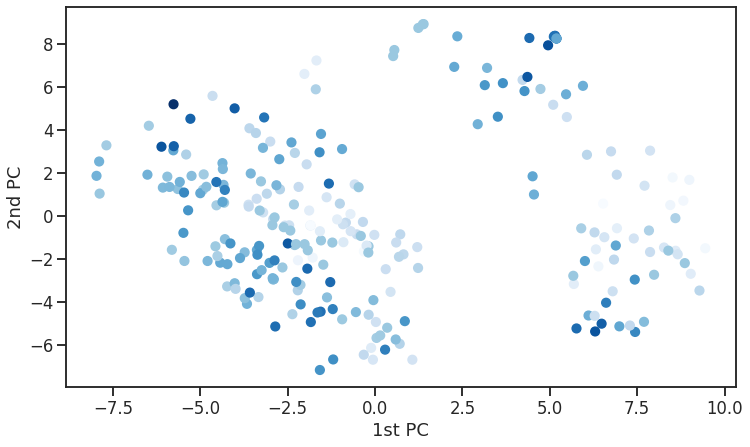

In [35]:
two_dimensional_pca_model=PCA(n_components=2) # call the PCA function with two components
two_dimensional_pca_model.fit(sa_macroeconomic_cleansed_dataset.iloc[::, 155: 308]) # fit the PCA model with two components
sa_two_dimensional_macroeconomic_dataset=two_dimensional_pca_model.transform(sa_macroeconomic_cleansed_dataset.iloc[::, 155: 308]) # create a data with principal components of the PCA model with two components
plt.scatter(sa_two_dimensional_macroeconomic_dataset[:, 0], sa_two_dimensional_macroeconomic_dataset[:, 1], c=sa_macroeconomic_cleansed_dataset.iloc[::, 15], cmap="Blues", s=75) 
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.show() # visualize South Africa"s macroeconomic data in two dimensions

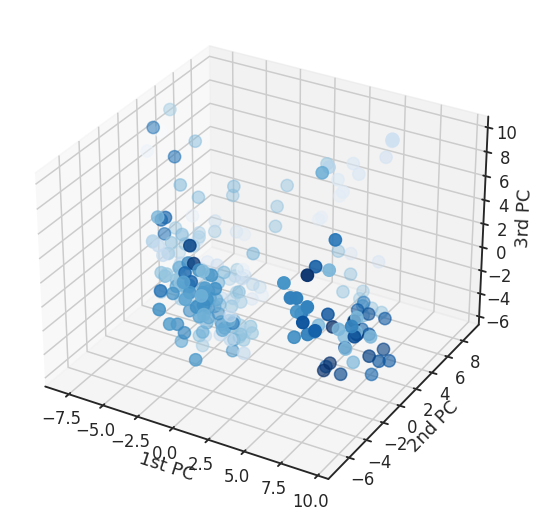

In [36]:
three_dimensional_pca_model=PCA(n_components=3) # call the PCA model with three components
three_dimensional_pca_model.fit(sa_macroeconomic_cleansed_dataset.iloc[::, 155: 308]) # fit the PCA model with three components
sa_three_dimensional_macroeconomic_dataset=three_dimensional_pca_model.transform(sa_macroeconomic_cleansed_dataset.iloc[::, 155: 308]) # create a data set with principal components of the PCA model with three components 
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(sa_three_dimensional_macroeconomic_dataset[:, 0], sa_three_dimensional_macroeconomic_dataset[:, 1], sa_three_dimensional_macroeconomic_dataset[:, 2],  c=sa_macroeconomic_cleansed_dataset.iloc[::, 154], cmap="Blues", s=150) 
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_zlabel("3rd PC")
fig.show() # visualize South Africa"s macroeconomic data in three dimensions

# An Index that Provides Insight into Economic Activities in South Africa

The principal component analysis method produced an economic index that offers insight into economic activities in South Africa based on the explained variance $(EV)$ ratio. 

The table below shows an index that provides insight into economic activities in South Africa 

In [37]:
standard_scaler=StandardScaler() # call the standard scaler function
standardized_sa_macroeconomic_reduced_data=standard_scaler.fit_transform(sa_macroeconomic_cleansed_dataset.iloc[::, 155: 308]) # standardize and tabulate South Africa's macroeconomic data
pca=PCA() # call the PCA function
pca.fit_transform(standardized_sa_macroeconomic_reduced_data) # fit standardized version of South Africa's macroeconomic features using the PCA method
sa_macroeconomic_index_dataset=pca.explained_variance_ # extract the variance ratio explained by each South African macroeconomic feature
# tabulate South African macroeconomic features with the explained variance ratio
sa_macroeconomic_index_dataset=pd.DataFrame(sa_macroeconomic_index_dataset, columns=["Explained variance ratio"]) 
sa_macroeconomic_index_dataset.index=sa_macroeconomic_cleansed_dataset.iloc[::, 155: 308].columns # obtain South African macroeconomic features' columns
sa_macroeconomic_index_dataset_rounded=round(sa_macroeconomic_index_dataset, 4) # round off the obtained explained variance ratio values
sa_macroeconomic_index_dataset_rounded.head(10) # show top 10 South African macroeconomic features

,Explained variance ratio
Business Tendency Surveys for Manufacturing: CI: Composite Indicators: OECD Indicator _diff,20.2738
Real Effective Exchange Rates Based on Manufacturing Consumer Price _diff,14.0164
National Currency to US Dollar Exchange Rate: Average of Daily Rates _diff,12.9776
National Currency to US Dollar Spot Exchange Rate _diff,8.0563
CPI: Total Food Excluding Restaurants _diff,6.3136
"CPI: OECD Groups: Fuel, Electricity, and Gasoline _diff",5.8097
CPI: OECD Groups: All Items Non-Food and Non-Energy _diff,4.6073
Commercial Real Estate Loans to Total Loans _diff,4.3957
COS: CI: Composite Indicators: OECD Indicator _diff,3.8083
U.S. Exports of Goods by F.A.S. Basis to South Africa_diff,3.1414


# The Performance of Models Trained on Low-Dimensional Economic Activities when Predicting the Reaction of Stock Market Returns to Changing Economic Activities in South Africa

The principal component analysis method reduced dimensions of economic activities in South Africa into meaningful eigenvectors. This segment compares the performance of models trained with low dimensions of economic activities in South Africa to the performance of models trained with high dimensions of economic activities in South Africa.

The table below shows the performance of models trained on low-dimensional economic activities when predicting the reaction of stock market returns to changing economic activities in South Africa over four periods.

In [38]:
default_pca_model=PCA() # call the PCA function
default_pca_model.fit(sa_macroeconomic_cleansed_dataset.iloc[::, 155: 308]) # fit the PCA model with two components
default_pca_model_data_columns_list=sa_macroeconomic_cleansed_dataset.iloc[::, 155: 308].columns # specify column with South Africa's macroeconomic features 
default_pca_model_data_date_list=sa_macroeconomic_cleansed_dataset.iloc[::, 155: 308].index # specify index of South Africa's macroeconomic features 
default_pca_model_data=default_pca_model.transform(sa_macroeconomic_cleansed_dataset.iloc[::, 155: 308]) # reduce South Africa's macroeconomic features data dimension using PCA
default_pca_model_data= pd.DataFrame(default_pca_model_data, index=default_pca_model_data_date_list, columns=default_pca_model_data_columns_list) # tabulate PCs the PCA model with two components 
x=default_pca_model_data.iloc[::, 0: -1].columns # assign predictor features
y=pd.DataFrame(default_pca_model_data.iloc[::, -1]).columns # assign the target feature
# develop models with reduced South Africa's macroeconomic features


In [39]:
def default_models_pca_reduced_experiment(models, data, test_size_split_ratio, iterations=1):
    results={}
    for i in models:
        r_sqaured=[]
        mean_absolute_error=[]
        mean_squared_error=[]
        root_mean_squared_error=[]
        mean_absolute_percentage_error=[]
        for j in range(iterations):
            end=round(len(data)*test_size_split_ratio)
            x_train=data.iloc[::, 0: -1][:end]
            y_train=data.iloc[::, -1][:end]
            x_test=data.iloc[::, 0: -1][end:]
            y_test=data.iloc[::, -1][end:]
            x_train=scaler.fit_transform(x_train)
            x_test=scaler.transform(x_test)
            r_sqaured.append(metrics.r2_score(y_test, models[i].fit(x_train, y_train).predict(x_test)))
            mean_absolute_error.append(metrics.mean_absolute_error(y_test, models[i].fit(x_train, y_train).predict(x_test)))
            mean_squared_error.append(metrics.mean_squared_error(y_test, models[i].fit(x_train, y_train).predict(x_test)))
            root_mean_squared_error=np.sqrt(mean_squared_error)
            mean_absolute_percentage_error.append(metrics.mean_absolute_percentage_error(y_test, models[i].fit(x_train, y_train).predict(x_test)))
        results[i]=mean_absolute_error, mean_absolute_percentage_error,  mean_squared_error, root_mean_squared_error, r_sqaured
        results=pd.DataFrame(results, index=["MAE", "MAPE", "MSE", "RMSE", "R2"])
    return pd.DataFrame(results)
def default_models_pca_reduced_performance_appraisal_results(models_list, data):
    default_models_pca_reduced_h1_performance_appraisal=default_models_pca_reduced_experiment(models_list, data, 0.9875).transpose()
    default_models_pca_reduced_h1_performance_appraisal=pd.DataFrame(default_models_pca_reduced_h1_performance_appraisal["MAPE"])
    default_models_pca_reduced_h1_performance_appraisal.columns=["H1"]
    default_models_pca_reduced_h2_performance_appraisal=default_models_pca_reduced_experiment(models_list, data, 0.975).transpose()
    default_models_pca_reduced_h2_performance_appraisal=pd.DataFrame(default_models_pca_reduced_h2_performance_appraisal["MAPE"])
    default_models_pca_reduced_h2_performance_appraisal.columns=["H2"]
    default_models_pca_reduced_h3_performance_appraisal=default_models_pca_reduced_experiment(models_list, data, 0.95).transpose()
    default_models_pca_reduced_h3_performance_appraisal=pd.DataFrame(default_models_pca_reduced_h3_performance_appraisal["MAPE"])
    default_models_pca_reduced_h3_performance_appraisal.columns=["H3"]
    default_models_pca_reduced_h4_performance_appraisal=default_models_pca_reduced_experiment(models_list, data, 0.9).transpose()
    default_models_pca_reduced_h4_performance_appraisal=pd.DataFrame(default_models_pca_reduced_h4_performance_appraisal["MAPE"])
    default_models_pca_reduced_h4_performance_appraisal.columns=["H4"]
    default_models_pca_reduced_performance_appraisal=pd.concat([default_models_pca_reduced_h1_performance_appraisal, default_models_pca_reduced_h2_performance_appraisal, default_models_pca_reduced_h3_performance_appraisal, default_models_pca_reduced_h4_performance_appraisal], axis=1)
    default_models_pca_reduced_performance_appraisal=remove_brackets_seperator(default_models_pca_reduced_performance_appraisal)
    default_models_pca_reduced_performance_appraisal=round(default_models_pca_reduced_performance_appraisal, 4)
    return default_models_pca_reduced_performance_appraisal
for feature in list(default_pca_model_data.columns.values):
    scaler=StandardScaler()
    scaler.fit(default_pca_model_data[[feature]] )
    default_pca_model_data[feature]=scaler.transform(default_pca_model_data[[feature]])
def create_timestaped_data_matrix_multi( df, size ):
    X_nn,y_nn,dates=[],[],[]
    for i in range(df.shape[0]-size):
        X_nn.append( np.asarray(df.values[i: i + size]).astype(np.float64) )
        y_nn.append( default_pca_model_data.iloc[::, 0].values[i + size] )
        dates.append(default_pca_model_data.index[i + size])
    return np.array(X_nn), np.array(y_nn), dates
window_size=50
X_nn,y_nn,dates=create_timestaped_data_matrix_multi(default_pca_model_data, size=window_size)
def train_test_split_neural_network_ratios(split_ratio):
    test_size_ratio=split_ratio
    train_size=int((1-test_size_ratio) * len(y_nn))
    # Train Set
    y_train_nn=y_nn[:train_size]
    dates_train=dates[:train_size]
    y_test_nn=y_nn[train_size:]
    X_train_nn=X_nn[:train_size] 
    # Test Set
    dates_test=dates[train_size:]
    X_test_nn=X_nn[train_size:]
    y_train_nn_original=default_pca_model_data.iloc[::, 0][window_size: train_size + window_size] # Storing original columns for plotting graph
    y_test_nn_original=default_pca_model_data.iloc[::, 0][train_size + window_size:] # Storing original columns for plotting graph
    # Check length
    # len(y_train_nn)+len(y_test),len(y)
    return train_size, y_train_nn, dates_train,y_test_nn, X_train_nn ,dates_test, X_test_nn, y_train_nn_original, y_test_nn_original
train_size_h1, y_train_nn_h1, dates_train_h1, y_test_nn_h1, X_train_nn_h1, dates_test_h1, X_test_nn_h1, y_train_nn_original_h1, y_test_nn_original_h1=train_test_split_neural_network_ratios(0.0125)
train_size_h2, y_train_nn_h2, dates_train_h2, y_test_nn_h2, X_train_nn_h2, dates_test_h2, X_test_nn_h2, y_train_nn_original_h2, y_test_nn_original_h2=train_test_split_neural_network_ratios(0.025)
train_size_h3, y_train_nn_h3, dates_train_h3, y_test_nn_h3, X_train_nn_h3, dates_test_h3, X_test_nn_h3, y_train_nn_original_h3, y_test_nn_original_h3=train_test_split_neural_network_ratios(0.05)
train_size_h4, y_train_nn_h4, dates_train_h4, y_test_nn_h4, X_train_nn_h4, dates_test_h4, X_test_nn_h4, y_train_nn_original_h4, y_test_nn_original_h4=train_test_split_neural_network_ratios(0.1)
# Build the default recurrent neural network
def default_models_pca_reduced_rnn_structure(optimizer="adam"):
    default_models_pca_reduced_rnn=Sequential()
    default_models_pca_reduced_rnn.add(SimpleRNN(500, return_sequences=True, input_shape=(50,153)))
    default_models_pca_reduced_rnn.add(SimpleRNN(100)) 
    default_models_pca_reduced_rnn.add(Dense(1))
    default_models_pca_reduced_rnn.compile( loss="mean_absolute_percentage_error", optimizer=optimizer)
    return default_models_pca_reduced_rnn
default_models_pca_reduced_rnn=KerasRegressor(build_fn=default_models_pca_reduced_rnn_structure)
default_models_pca_reduced_rnn_history=default_models_pca_reduced_rnn.fit(X_train_nn_h1, y_train_nn_h1, validation_data=(X_test_nn_h1, y_test_nn_h1), epochs=20, batch_size=128, verbose=1)
default_models_pca_reduced_rnn_h1_predictions=default_models_pca_reduced_rnn.predict(X_test_nn_h1)
default_models_pca_reduced_rnn_h1_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h1, default_models_pca_reduced_rnn_h1_predictions)), columns=["H1"])
default_models_pca_reduced_rnn_h1_appraisal_results.index=["RNN"]
default_models_pca_reduced_rnn_history=default_models_pca_reduced_rnn.fit(X_train_nn_h2, y_train_nn_h2, validation_data=(X_test_nn_h2, y_test_nn_h2), epochs=20, batch_size=128, verbose=1)
default_models_pca_reduced_rnn_h2_predictions=default_models_pca_reduced_rnn.predict(X_test_nn_h2)
default_models_pca_reduced_rnn_h2_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h2, default_models_pca_reduced_rnn_h2_predictions)), columns=["H2"])
default_models_pca_reduced_rnn_h2_appraisal_results.index=["RNN"]
default_models_pca_reduced_rnn_history=default_models_pca_reduced_rnn.fit(X_train_nn_h3, y_train_nn_h3, validation_data=(X_test_nn_h3 ,y_test_nn_h3), epochs=20, batch_size=128, verbose=1)
default_models_pca_reduced_rnn_h3_predictions=default_models_pca_reduced_rnn.predict(X_test_nn_h3)
default_models_pca_reduced_rnn_h3_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h3, default_models_pca_reduced_rnn_h3_predictions)), columns=["H3"])
default_models_pca_reduced_rnn_h3_appraisal_results.index=["RNN"]
default_models_pca_reduced_rnn_history=default_models_pca_reduced_rnn.fit(X_train_nn_h4, y_train_nn_h4, validation_data=(X_test_nn_h4 ,y_test_nn_h4), epochs=20, batch_size=128, verbose=1)
default_models_pca_reduced_rnn_h4_predictions=default_models_pca_reduced_rnn.predict(X_test_nn_h4)
default_models_pca_reduced_rnn_h4_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h4, default_models_pca_reduced_rnn_h4_predictions)), columns=["H4"])
default_models_pca_reduced_rnn_h4_appraisal_results.index=["RNN"]
default_models_pca_reduced_rnn_performance_appraisal_results_keras=pd.concat([default_models_pca_reduced_rnn_h1_appraisal_results, default_models_pca_reduced_rnn_h2_appraisal_results, default_models_pca_reduced_rnn_h3_appraisal_results, default_models_pca_reduced_rnn_h4_appraisal_results], axis=1)
# Build the default long-short term memory
def default_models_pca_reduced_lstm_structure(optimizer="adam"):
    default_models_pca_reduced_lstm=Sequential()
    default_models_pca_reduced_lstm.add(LSTM(500, return_sequences=True, input_shape=(50,153)))
    default_models_pca_reduced_lstm.add(LSTM(100)) 
    default_models_pca_reduced_lstm.add(Dense(1))
    default_models_pca_reduced_lstm.compile( loss="mean_absolute_percentage_error", optimizer=optimizer)
    return default_models_pca_reduced_lstm
default_models_pca_reduced_lstm=KerasRegressor(build_fn=default_models_pca_reduced_lstm_structure)
default_models_pca_reduced_lstm_history=default_models_pca_reduced_lstm.fit(X_train_nn_h1, y_train_nn_h1, validation_data=(X_test_nn_h1, y_test_nn_h1), epochs=20, batch_size=128, verbose=1)
default_models_pca_reduced_lstm_h1_predictions=default_models_pca_reduced_lstm.predict(X_test_nn_h1)
default_models_pca_reduced_lstm_h1_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h1, default_models_pca_reduced_lstm_h1_predictions)), columns=["H1"])
default_models_pca_reduced_lstm_h1_appraisal_results.index=["LSTM"]
default_models_pca_reduced_lstm_history=default_models_pca_reduced_lstm.fit(X_train_nn_h2, y_train_nn_h2, validation_data=(X_test_nn_h2, y_test_nn_h2), epochs=20, batch_size=128, verbose=1)
default_models_pca_reduced_lstm_h2_predictions=default_models_pca_reduced_lstm.predict(X_test_nn_h2)
default_models_pca_reduced_lstm_h2_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h2, default_models_pca_reduced_lstm_h2_predictions)), columns=["H2"])
default_models_pca_reduced_lstm_h2_appraisal_results.index=["LSTM"]
default_models_pca_reduced_lstm_history=default_models_pca_reduced_lstm.fit(X_train_nn_h3, y_train_nn_h3, validation_data=(X_test_nn_h3 ,y_test_nn_h3), epochs=20, batch_size=128, verbose=1)
default_models_pca_reduced_lstm_h3_predictions=default_models_pca_reduced_lstm.predict(X_test_nn_h3)
default_models_pca_reduced_lstm_h3_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h3, default_models_pca_reduced_lstm_h3_predictions)), columns=["H3"])
default_models_pca_reduced_lstm_h3_appraisal_results.index=["LSTM"]
default_models_pca_reduced_lstm_history=default_models_pca_reduced_lstm.fit(X_train_nn_h4, y_train_nn_h4, validation_data=(X_test_nn_h4 ,y_test_nn_h4), epochs=20, batch_size=128, verbose=1)
default_models_pca_reduced_lstm_h4_predictions=default_models_pca_reduced_lstm.predict(X_test_nn_h4)
default_models_pca_reduced_lstm_h4_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h4, default_models_pca_reduced_lstm_h4_predictions)), columns=["H4"])
default_models_pca_reduced_lstm_h4_appraisal_results.index=["LSTM"]
default_models_pca_reduced_lstm_performance_appraisal_results_keras=pd.concat([default_models_pca_reduced_lstm_h1_appraisal_results, default_models_pca_reduced_lstm_h2_appraisal_results, default_models_pca_reduced_lstm_h3_appraisal_results, default_models_pca_reduced_lstm_h4_appraisal_results], axis=1)
# Build the default gated recurrent unit structure
def default_models_pca_reduced_gru_structure(optimizer="adam"):
    default_models_pca_reduced_gru=Sequential()
    default_models_pca_reduced_gru.add(GRU(500, return_sequences=True, input_shape=(50,153) ) )
    default_models_pca_reduced_gru.add(GRU(100)) 
    default_models_pca_reduced_gru.add(Dense(1))
    default_models_pca_reduced_gru.compile(loss="mean_absolute_percentage_error", optimizer=optimizer)
    return default_models_pca_reduced_gru
default_models_pca_reduced_gru=KerasRegressor(build_fn=default_models_pca_reduced_gru_structure)
default_models_pca_reduced_gru_history=default_models_pca_reduced_gru.fit(X_train_nn_h1, y_train_nn_h1, validation_data=(X_test_nn_h1, y_test_nn_h1), epochs=20, batch_size=128, verbose=1)
default_models_pca_reduced_gru_h1_predictions=default_models_pca_reduced_gru.predict(X_test_nn_h1)
default_models_pca_reduced_gru_h1_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h1, default_models_pca_reduced_gru_h1_predictions)), columns=["H1"])
default_models_pca_reduced_gru_h1_appraisal_results.index=["GRU"]
default_models_pca_reduced_gru_history=default_models_pca_reduced_gru.fit(X_train_nn_h2, y_train_nn_h2, validation_data=(X_test_nn_h2, y_test_nn_h2), epochs=20, batch_size=128, verbose=1)
default_models_pca_reduced_gru_h2_predictions=default_models_pca_reduced_gru.predict(X_test_nn_h2)
default_models_pca_reduced_gru_h2_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h2, default_models_pca_reduced_gru_h2_predictions)), columns=["H2"])
default_models_pca_reduced_gru_h2_appraisal_results.index=["GRU"]
default_models_pca_reduced_gru_history=default_models_pca_reduced_gru.fit(X_train_nn_h3, y_train_nn_h3, validation_data=(X_test_nn_h3 ,y_test_nn_h3), epochs=20, batch_size=128, verbose=1)
default_models_pca_reduced_gru_h3_predictions=default_models_pca_reduced_gru.predict(X_test_nn_h3)
default_models_pca_reduced_gru_h3_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h3, default_models_pca_reduced_gru_h3_predictions)), columns=["H3"])
default_models_pca_reduced_gru_h3_appraisal_results.index=["GRU"]
default_models_pca_reduced_gru_history=default_models_pca_reduced_gru.fit(X_train_nn_h4, y_train_nn_h4, validation_data=(X_test_nn_h4 ,y_test_nn_h4), epochs=20, batch_size=128, verbose=1)
default_models_pca_reduced_gru_h4_predictions=default_models_pca_reduced_gru.predict(X_test_nn_h4)
default_models_pca_reduced_gru_h4_appraisal_results=pd.DataFrame(pd.Series(metrics.mean_absolute_percentage_error(y_test_nn_original_h4, default_models_pca_reduced_gru_h4_predictions)), columns=["H4"])
default_models_pca_reduced_gru_h4_appraisal_results.index=["GRU"]
default_models_pca_reduced_gru_performance_appraisal_results_keras=pd.concat([default_models_pca_reduced_gru_h1_appraisal_results, default_models_pca_reduced_gru_h2_appraisal_results, default_models_pca_reduced_gru_h3_appraisal_results, default_models_pca_reduced_gru_h4_appraisal_results], axis=1)

Epoch 1/20
2/2 [==============================] - 3s 594ms/step - loss: 462.0980 - val_loss: 223.5059
Epoch 2/20
2/2 [==============================] - 0s 206ms/step - loss: 2014.0839 - val_loss: 63.4639
Epoch 3/20
2/2 [==============================] - 0s 200ms/step - loss: 1330.0698 - val_loss: 171.3046
Epoch 4/20
2/2 [==============================] - 0s 201ms/step - loss: 654.7219 - val_loss: 267.2765
Epoch 5/20
2/2 [==============================] - 0s 198ms/step - loss: 463.9250 - val_loss: 326.3657
Epoch 6/20
2/2 [==============================] - 0s 199ms/step - loss: 409.6128 - val_loss: 328.9202
Epoch 7/20
2/2 [==============================] - 0s 203ms/step - loss: 340.2746 - val_loss: 310.8571
Epoch 8/20
2/2 [==============================] - 0s 206ms/step - loss: 228.1349 - val_loss: 304.5219
Epoch 9/20
2/2 [==============================] - 0s 198ms/step - loss: 238.0973 - val_loss: 308.2407
Epoch 10/20
2/2 [==============================] - 0s 203ms/step - loss: 164.0557

In [40]:
default_regression_models_pca_reduced_performance_appraisal_results=default_models_pca_reduced_performance_appraisal_results(regression_based_models_list, default_pca_model_data) 
default_tree_based_models_pca_reduced_performance_appraisal_results=default_models_pca_reduced_performance_appraisal_results(tree_based_models_list, default_pca_model_data)
default_neural_networks_pca_reduced_performance_appraisal_results=default_models_pca_reduced_performance_appraisal_results(neural_networks_list, default_pca_model_data)                                              
combined_default_models_pca_reduced_keras_neural_network_performance_appraisal_results=pd.concat([default_models_pca_reduced_rnn_performance_appraisal_results_keras,
                                                                                                  default_models_pca_reduced_lstm_performance_appraisal_results_keras,
                                                                                                  default_models_pca_reduced_gru_performance_appraisal_results_keras])
combined_pca_reduced_models_performance_appraisal_results=pd.concat([default_regression_models_pca_reduced_performance_appraisal_results,
                                                                     default_tree_based_models_pca_reduced_performance_appraisal_results,
                                                                     default_neural_networks_pca_reduced_performance_appraisal_results,
                                                                     combined_default_models_pca_reduced_keras_neural_network_performance_appraisal_results])
combined_pca_reduced_models_performance_appraisal_results["AVG MAPE"]=combined_pca_reduced_models_performance_appraisal_results.mean(axis=1)
combined_pca_reduced_models_performance_appraisal_results=round(combined_pca_reduced_models_performance_appraisal_results, 4)
combined_pca_reduced_models_performance_appraisal_results

,H1,H2,H3,H4,AVG MAPE
OLS,0.2073,0.1417,0.1419,0.0764,0.1418
Ridge,0.3916,0.2615,0.1906,0.1619,0.2514
Lasso,0.9834,0.9615,0.9901,0.9901,0.9813
ElasticNet,0.9834,0.9615,0.9901,0.9901,0.9813
DT,8.1019,3.0792,2.6808,3.9344,4.4491
RFT,3.8113,2.5089,1.4742,1.0391,2.2084
XGBT,11.5820,3.5078,4.9852,1.5999,5.4187
RBM,3.5441,2.2056,1.7505,1.3220,2.2055
MLP,15.0434,4.3829,4.4118,3.6857,6.8810
RNN,2.4133,1.6942,2.1286,1.6924,1.9821


# The Learning Curve of the Optimal Model that Predicted the Reaction of Stock Market Returns to Changing Economic Activities in South Africa

The figure below shows the learning curve of the optimal model that predicted the reaction of stock market returns to changing economic activities in South Africa.